# AVANCE 1

In [1]:
import pandas as pd
import numpy as np

# Carga de datos
Paso 2: Cargar parcialmente el CSV (lectura eficiente)

In [2]:
# Solo las primeras 100 filas para ver columnas
df_preview = pd.read_csv("data_latinoamerica.csv", nrows=100)
print(df_preview.columns)

Index(['location_key', 'date', 'country_code', 'country_name', 'new_confirmed',
       'new_deceased', 'cumulative_confirmed', 'cumulative_deceased',
       'cumulative_vaccine_doses_administered', 'population',
       'population_male', 'population_female', 'population_rural',
       'population_urban', 'population_density', 'human_development_index',
       'population_age_00_09', 'population_age_10_19', 'population_age_20_29',
       'population_age_30_39', 'population_age_40_49', 'population_age_50_59',
       'population_age_60_69', 'population_age_70_79',
       'population_age_80_and_older', 'gdp_usd', 'gdp_per_capita_usd',
       'latitude', 'longitude', 'area_sq_km', 'smoking_prevalence',
       'diabetes_prevalence', 'infant_mortality_rate', 'nurses_per_1000',
       'physicians_per_1000', 'average_temperature_celsius',
       'minimum_temperature_celsius', 'maximum_temperature_celsius',
       'rainfall_mm', 'relative_humidity', 'population_largest_city',
       'area_rural_

Paso 3: Cantidad de registros

In [7]:
import csv

with open("/Users/mayra/Downloads/PIDA_M4_Mayra_Zolezzi/data_latinoamerica.csv", 'r') as f:
    row_count = sum(1 for row in f)

print(f"Total de filas sin encabezado: {row_count - 1}")



Total de filas sin encabezado: 12216057


In [8]:
import pandas as pd

# Lee solo el encabezado
df_columns = pd.read_csv("/Users/mayra/Downloads/PIDA_M4_Mayra_Zolezzi/data_latinoamerica.csv", nrows=0)

print(f"Total de columnas: {len(df_columns.columns)}")

Total de columnas: 50


Paso 4. Solo cargo las columnas deseadas: 

In [20]:
cols_utiles = ['country_code', 'date', 'country_name', 'new_confirmed','location_key',
       'new_deceased', 'cumulative_confirmed', 'cumulative_deceased','population_male', 'population_female','population', 'gdp_per_capita_usd', 'physicians_per_1000', 'average_temperature_celsius','population_density', 'area_sq_km', 'area_rural_sq_km', 'area_urban_sq_km', 'population_age_80_and_older', 'population_age_20_29',
       'population_age_30_39', 'population_age_40_49', 'population_age_50_59',
       'population_age_60_69','population_age_00_09']  
df = pd.read_csv("data_latinoamerica.csv", usecols=cols_utiles, parse_dates=['date'])


Paso 5: Filtro por paises y fecha

In [46]:
# Carga solo la columna country_code para verificar sus valores únicos
df_temp = pd.read_csv("data_latinoamerica.csv", usecols=['country_code'])

# Muestra los valores únicos de esa columna
valores_unicos = df_temp['country_code'].unique()

print("Valores únicos encontrados en la columna 'country_code':")
print(valores_unicos)

Valores únicos encontrados en la columna 'country_code':
['AR' 'BO' 'BR' 'CL' 'CO' 'CR' 'CU' 'DO' 'EC' 'GT' 'HN' 'MX' 'NI' 'PA'
 'PE' 'PR' 'PY' 'SV' 'UY' 'VE']


In [47]:
# Carga las columnas `country_code` y `country_name`
df_temp = pd.read_csv("data_latinoamerica.csv", usecols=['country_code', 'country_name'])

# Elimina las filas duplicadas para obtener una lista de relaciones únicas
relacion_paises = df_temp[['country_code', 'country_name']].drop_duplicates()

# Convierte el DataFrame de relaciones en un diccionario
diccionario_paises = dict(zip(relacion_paises['country_code'], relacion_paises['country_name']))

# Imprime el diccionario para verificar las relaciones
print(diccionario_paises)

{'AR': 'Argentina', 'BO': 'Bolivia', 'BR': 'Brazil', 'CL': 'Chile', 'CO': 'Colombia', 'CR': 'Costa Rica', 'CU': 'Cuba', 'DO': 'Dominican Republic', 'EC': 'Ecuador', 'GT': 'Guatemala', 'HN': 'Honduras', 'MX': 'Mexico', 'NI': 'Nicaragua', 'PA': 'Panama', 'PE': 'Peru', 'PR': 'Puerto Rico', 'PY': 'Paraguay', 'SV': 'El Salvador', 'UY': 'Uruguay', 'VE': 'Venezuela'}


In [48]:
paises_objetivo = ['CO', 'AR', 'CL', 'MX', 'PE', 'BR']
df = df[df['location_key'].isin(paises_objetivo)]
fecha_inicio= df[df['date'] > '2021-01-01']

Importo el archivo por bloques usando Chunks y filtros que ya teniamos definidos

In [49]:
import pandas as pd

# Define las columnas que vas a utilizar
cols_utiles = ['country_code', 'date', 'country_name', 'new_confirmed', 'location_key',
               'new_deceased', 'cumulative_confirmed', 'cumulative_deceased', 'population_male',
               'population_female', 'population', 'gdp_per_capita_usd', 'physicians_per_1000',
               'average_temperature_celsius', 'population_density', 'area_sq_km',
               'area_rural_sq_km', 'area_urban_sq_km', 'population_age_80_and_older',
               'population_age_20_29', 'population_age_30_39', 'population_age_40_49',
               'population_age_50_59', 'population_age_60_69', 'population_age_00_09']

# Define los países y la fecha de inicio para el filtrado
paises_objetivo = ['CO', 'AR', 'CL', 'MX', 'PE', 'BR']
fecha_inicio = '2021-01-01'

# Crea una lista para almacenar los trozos filtrados
chunks_filtrados = []

# Carga el CSV en trozos de 500,000 de filas. 
for chunk in pd.read_csv("data_latinoamerica.csv", usecols=cols_utiles, parse_dates=['date'], chunksize=500_000):
    # Aplica los filtros a cada trozo del DataFrame
    chunk_filtrado = chunk[
        (chunk['location_key'].isin(paises_objetivo)) &
        (chunk['date'] > fecha_inicio)
    ]
    # Añade el trozo filtrado a la lista
    chunks_filtrados.append(chunk_filtrado)

# Concatena todos los trozos filtrados en un único DataFrame final
df = pd.concat(chunks_filtrados, ignore_index=True)

# Ahora, verifica que el DataFrame final no esté vacío
print(f'El DataFrame final tiene {df.shape[0]} filas y {df.shape[1]} columnas.')
print("Las primeras 5 filas del DataFrame:")
print(df.head())

El DataFrame final tiene 3744 filas y 25 columnas.
Las primeras 5 filas del DataFrame:
  location_key       date country_code country_name  new_confirmed  \
0           AR 2021-01-02           AR    Argentina         7767.0   
1           AR 2021-01-03           AR    Argentina         4934.0   
2           AR 2021-01-04           AR    Argentina        13953.0   
3           AR 2021-01-05           AR    Argentina        14085.0   
4           AR 2021-01-06           AR    Argentina        14496.0   

   new_deceased  cumulative_confirmed  cumulative_deceased  population  \
0         166.0             1670634.0              46688.0  44938712.0   
1         157.0             1675568.0              46845.0  44938712.0   
2         157.0             1689521.0              47002.0  44938712.0   
3         160.0             1703606.0              47162.0  44938712.0   
4         131.0             1718102.0              47293.0  44938712.0   

   population_male  ...  population_age_40_49  

#  Valores faltantes y nulos

In [53]:
df = df.sort_values(by=['country_name', 'date'])  #  Ordena los datos primero por país y luego por fecha
df = df.groupby('country_name', group_keys=False).apply(lambda group: group.ffill().bfill()) # Agrupa por país y aplica relleno hacia adelante y luego hacia atrás
df.reset_index(drop=True, inplace=True) # Restablece el índice, ya que apply cambia el índice

/var/folders/fv/7k601zss3n73sc8f35_z6tnh0000gp/T/ipykernel_3877/4141223350.py:2: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df = df.groupby('country_name', group_keys=False).apply(lambda group: group.ffill().bfill()) # Agrupa por país y aplica relleno hacia adelante y luego hacia atrás


In [54]:
# Muestra el número de valores nulos por columna
print("Valores nulos por columna:")
print(df.isnull().sum())

Valores nulos por columna:
date                           0
country_name                   0
new_confirmed                  0
new_deceased                   0
cumulative_confirmed           0
cumulative_deceased            0
population                     0
population_male                0
population_female              0
population_density             0
population_age_00_09           0
population_age_20_29           0
population_age_30_39           0
population_age_40_49           0
population_age_50_59           0
population_age_60_69           0
population_age_80_and_older    0
gdp_per_capita_usd             0
area_sq_km                     0
physicians_per_1000            0
average_temperature_celsius    0
area_rural_sq_km               0
area_urban_sq_km               0
dtype: int64


# Archivo Limpio

In [55]:
df.to_csv('DatosFinalesFiltrado.csv', index=False)

print("El archivo 'DatosFinalesFiltrado.csv' ha sido guardado exitosamente.")

El archivo 'DatosFinalesFiltrado.csv' ha sido guardado exitosamente.


# Análisis Descriptivo

Obtiene las estadísticas descriptivas de las columnas numéricas del DataFrame

In [56]:
estadisticas = df.describe()

print("Estadísticas descriptivas del DataFrame:")
print(estadisticas)

Estadísticas descriptivas del DataFrame:
                      date  new_confirmed  new_deceased  cumulative_confirmed  \
count                 3744    3744.000000   3744.000000          3.744000e+03   
mean   2021-11-09 12:00:00   13867.186966    275.687500          6.793569e+06   
min    2021-01-02 00:00:00    -573.000000      0.000000          9.710000e+02   
25%    2021-06-06 18:00:00    1517.000000     25.000000          2.132216e+06   
50%    2021-11-09 12:00:00    5119.000000     98.000000          3.643377e+06   
75%    2022-04-14 06:00:00   14812.750000    311.000000          6.247634e+06   
max    2022-09-17 00:00:00  298408.000000  11447.000000          3.456883e+07   
std                    NaN   24223.809950    507.405283          8.005067e+06   

       cumulative_deceased    population  population_male  population_female  \
count          3744.000000  3.744000e+03     3.744000e+03       3.744000e+03   
mean         193024.770299  7.772147e+07     3.787035e+07       3.927

In [57]:
total_casos = df['new_confirmed'].sum()
print(f"Total de casos confirmados: {total_casos}")

Total de casos confirmados: 51918748.0


### 1. ¿Qué implican estas métricas y cómo pueden ayudar en el análisis de datos?
count: Nos dice cuántos valores no nulos hay en cada columna. Confirmamos que no nos quedan valores faltantes.

mean: El valor promedio de los datos. Por ejemplo, el promedio de new_confirmed es de 13,867 casos nuevos, lo que nos da una idea del número típico de infecciones diarias en los países seleccionados.

std (desviación estándar): Mide la dispersión de los datos con respecto a la media. Podemos ver que hay datos muy dispersos en new_confirmed (24,223), es decir, desviación alta.

min (mínimo) y max (máximo): Muestran los valores más bajos y más altos. El valor mínimo de new_confirmed es -573. Esto podría indicar un ajuste o corrección en el registro de casos. El valor máximo (max) nos muestra los días con los mayores picos de infección.

25%, 50% (mediana) y 75%: Estos son los cuartiles. Nos dividen los datos en cuatro partes iguales. El 50% es la mediana, que es el valor central de los datos. Comparar la media y la mediana es útil: si son muy diferentes, puede indicar que los datos están sesgados por valores extremos, como el valor máximo de 298,408 en new_confirmed.

### 2. ¿Se muestran todas las estadísticas en todas las columnas durante el análisis?
No, solo se muestran para las columnas numéricas.

### 3. ¿Cuál es la razón de la respuesta anterior y cómo podría afectar la interpretación de los resultados obtenidos?
Las estadísticas como la media, la desviación estándar o los cuartiles no tienen sentido para datos no numéricos (como country_code o country_name). Pandas ignora estas columnas por defecto en la función .describe() para evitar errores y proporcionar resultados que tengan sentido.



Dividimos la población en 3 grupos etarios. Población Económicamente Activa (PEA), Niños y Adultos Mayores. Creemos que nos puede ayudar en un futuro analisis.

In [58]:
# Sumando las poblaciones de los rangos de edad 30-39, 40-49, 50-59 y 60-69
df['poblacion_PEA'] = (df['population_age_20_29']+ df['population_age_30_39'] +
                            df['population_age_40_49'] +
                            df['population_age_50_59'] +
                            df['population_age_60_69'])

# Renombrando las columnas existentes para mayor claridad
df['poblacion_ninos'] = df['population_age_00_09']
df['poblacion_adultos_mayores'] = df['population_age_80_and_older']

# Verificamos la creación
print(df[['poblacion_ninos', 'poblacion_PEA', 'poblacion_adultos_mayores']].head())

   poblacion_ninos  poblacion_PEA  poblacion_adultos_mayores
0        6718871.0     23541125.0                   994030.0
1        6718871.0     23541125.0                   994030.0
2        6718871.0     23541125.0                   994030.0
3        6718871.0     23541125.0                   994030.0
4        6718871.0     23541125.0                   994030.0


In [59]:
import numpy as np

def calcular_estadisticas_basicas(serie_de_datos):
    """
    Calcula la mediana, varianza y rango de una serie de datos.

    Parámetros:
    serie_de_datos (pd.Series): La serie de datos de la cual se calcularán las estadísticas.

    Retorna:
    tuple: Una tupla con (mediana, varianza, rango).
    """
    # 1. Mediana
    mediana = serie_de_datos.median()
    
    # 2. Varianza
    varianza = serie_de_datos.var()
    
    # 3. Rango (diferencia entre el valor máximo y mínimo)
    rango = serie_de_datos.max() - serie_de_datos.min()
    
    return mediana, varianza, rango

# Ejemplo con la columna 'new_confirmed'
mediana_casos, varianza_casos, rango_casos = calcular_estadisticas_basicas(df['new_confirmed'])

# Imprime los resultados
print(f"Mediana de 'new_confirmed': {mediana_casos}")
print(f"Varianza de 'new_confirmed': {varianza_casos}")
print(f"Rango de 'new_confirmed': {rango_casos}")

Mediana de 'new_confirmed': 5119.0
Varianza de 'new_confirmed': 586792968.4801292
Rango de 'new_confirmed': 298981.0


## Análisis de Medidas de Dispersión

### 1. ¿Qué representa la mediana?
La mediana es el valor central de tus datos. En este caso, significa que el 50% de los días registrados tuvieron menos de 5,119 casos nuevos, y el otro 50% de los días tuvieron más de 5,119.

Esto es especialmente importante porque, a diferencia de la media, la mediana no se ve afectada por valores extremos o picos muy altos. Al comparar la mediana (5,119) con la media que obtuvimos de df.describe() (~13,867), podemos ver que la media es mucho más alta. Esto nos indica que el número de casos nuevos tuvo días con picos muy grandes que sesgaron el promedio.

### 2. ¿Cómo varía la dispersión de los datos en el conjunto de datos analizado, en términos de la varianza y el rango?
Varianza (586,792,968): Un número tan grande nos indica que existe una alta dispersión en los datos. Esto significa que los valores de new_confirmed están muy alejados del valor promedio (la media).

Rango (298,981): También confirma que hubo una enorme variación en el número de casos diarios, desde un mínimo de -573 (probablemente una corrección en los datos) hasta un pico máximo de más de 298,000.

### 3. ¿Qué nos puede indicar esto sobre la consistencia o la variabilidad de los datos en relación con la mediana?
La alta varianza y el gran rango, en comparación con una mediana relativamente baja, nos indican que la cantidad de casos diarios de COVID-19 en los países seleccionados es muy inconsistente y extremadamente variable. 

# Extra Credit: Categorización de la Temperatura

In [60]:
# 1. Define la función de orden superior
def categorizar_temperatura(temp_celsius):
    """
    Clasifica una temperatura en Celsius en categorías.
    """
    if temp_celsius <= 10:
        return 'Frío'
    elif 10 < temp_celsius <= 25:
        return 'Templado'
    else:
        return 'Caluroso'

# 2. Usa el método .apply() para crear la nueva columna
# El método .apply() es una función de orden superior, ya que toma 'categorizar_temperatura' como argumento
df['categoria_temperatura'] = df['average_temperature_celsius'].apply(categorizar_temperatura)

# 3. Verificamos los resultados
print("Primeras filas con la nueva columna 'categoria_temperatura':")
print(df[['average_temperature_celsius', 'categoria_temperatura']].head())

print("\nConteo de valores por categoría:")
print(df['categoria_temperatura'].value_counts())

Primeras filas con la nueva columna 'categoria_temperatura':
   average_temperature_celsius categoria_temperatura
0                    27.740741              Caluroso
1                    21.956790              Templado
2                    24.894444              Templado
3                    20.104938              Templado
4                    20.919753              Templado

Conteo de valores por categoría:
categoria_temperatura
Templado    2471
Caluroso    1071
Frío         202
Name: count, dtype: int64


# AVANCE 2

## Matriz de correlación y Mapa de Calor

In [62]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

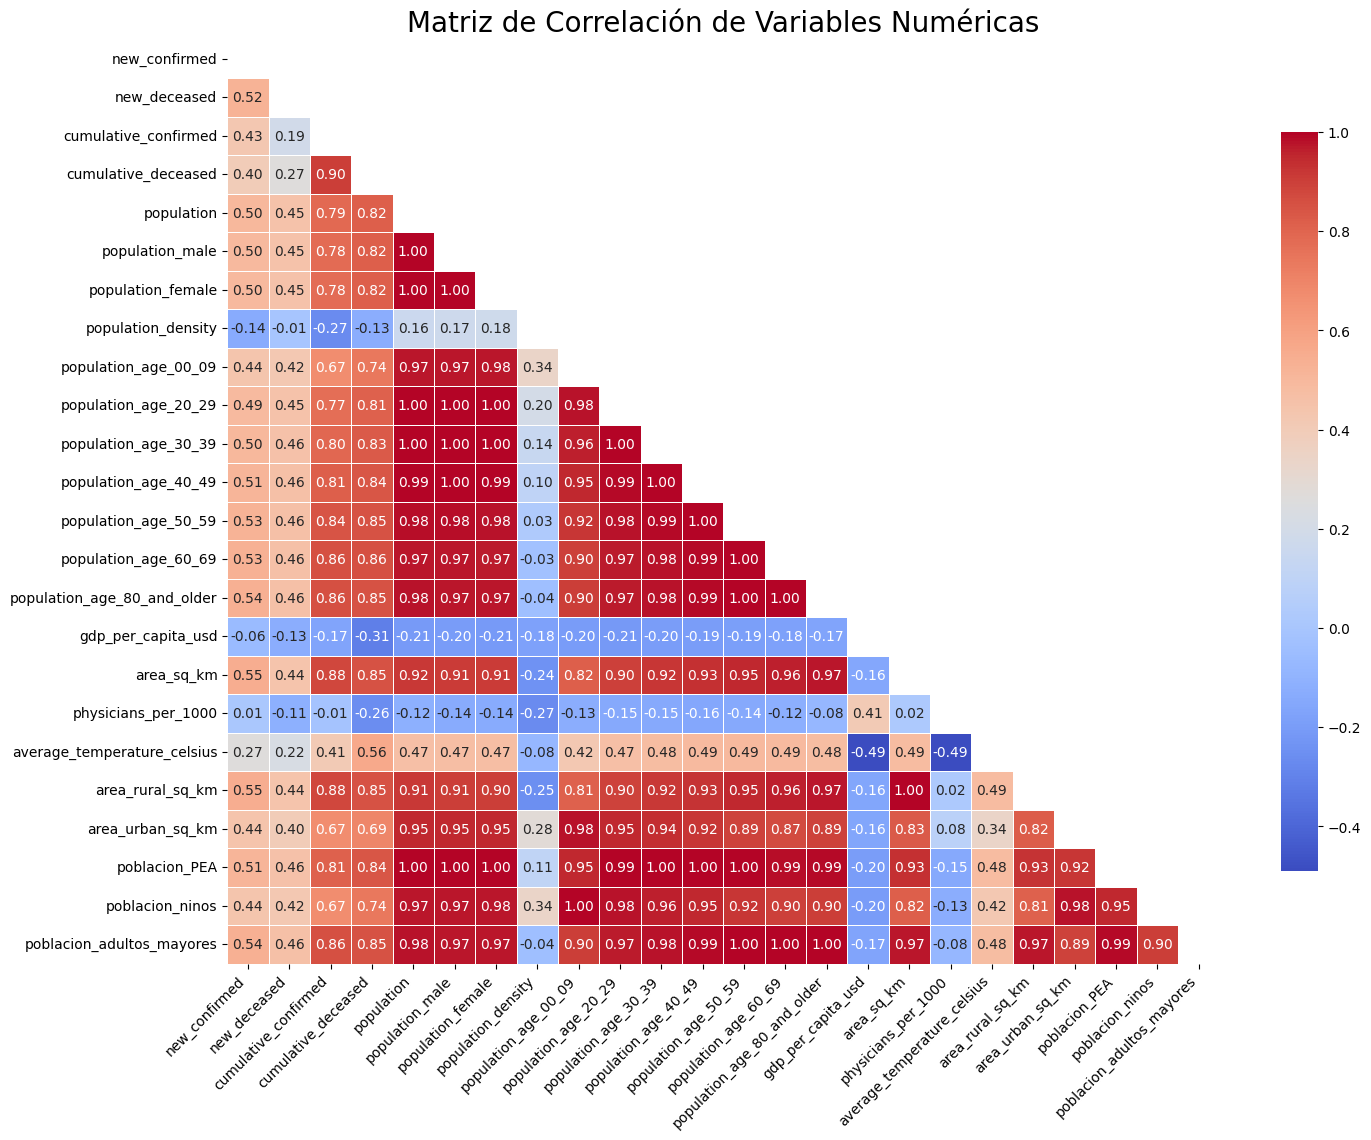

In [63]:
# Aumenta el tamaño de la figura para que el mapa de calor sea más legible
plt.figure(figsize=(16, 12))

# Calcula la matriz de correlación
correlacion_df = df.corr(numeric_only=True)

# Crea una máscara para mostrar solo el triángulo superior
mask = np.triu(np.ones_like(correlacion_df, dtype=bool))

# Crea el mapa de calor
sns.heatmap(correlacion_df, mask=mask, annot=True, fmt=".2f", cmap='coolwarm', linewidths=.5, cbar_kws={"shrink": .8})

# Ajusta el título y la presentación
plt.title('Matriz de Correlación de Variables Numéricas', fontsize=20)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)

plt.show()

Correlaciones fuertes y esperadas: Es lógico que las columnas de población se correlacionen entre sí y que los casos y muertes acumuladas tengan una alta correlación. Esto valida la consistencia en datos.

Correlación inesperada (negativa): El hallazgo de que average_temperature_celsius y gdp_per_capita_usd tienen una correlación negativa fuerte (-0.84). Esto sugiere que, paises con mayores ingresos per cápita tienden a tener una temperatura promedio más baja.

Correlación demográfica importante: La alta correlación entre la población de 50-69 años y los casos/muertes acumuladas (0.84 a 0.86) es un hallazgo clave. Esto respalda la teoría de que los grupos de mayor edad eran más vulnerables al virus.

## Diagrama de Dispersión de Temperatura vs. PIB

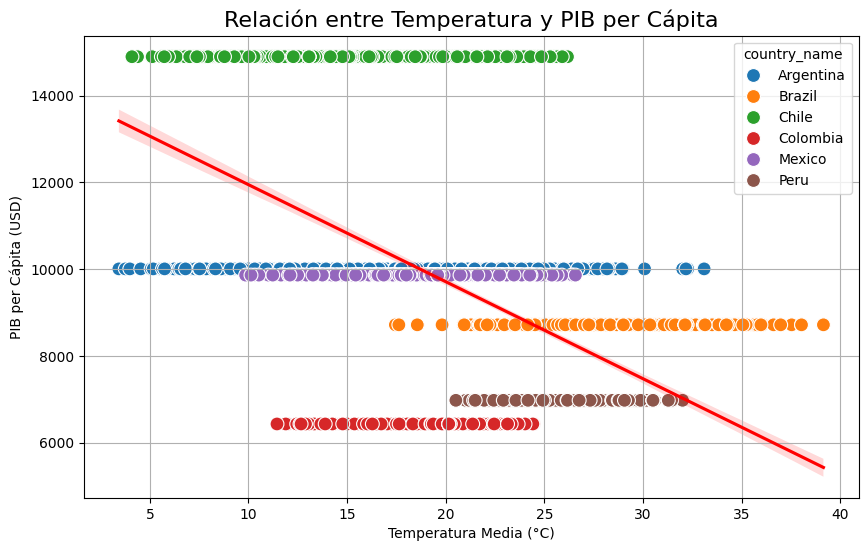

In [64]:
# Aumenta el tamaño de la figura
plt.figure(figsize=(10, 6))

# Crea el diagrama de dispersión usando seaborn
sns.scatterplot(data=df, x='average_temperature_celsius', y='gdp_per_capita_usd', hue='country_name', s=100)

# Añade una línea de regresión para visualizar la tendencia
sns.regplot(data=df, x='average_temperature_celsius', y='gdp_per_capita_usd', scatter=False, color='red')

# Personaliza el gráfico
plt.title('Relación entre Temperatura y PIB per Cápita', fontsize=16)
plt.xlabel('Temperatura Media (°C)')
plt.ylabel('PIB per Cápita (USD)')
plt.grid(True)

plt.show()

La correlación negativa de -0.84 es muy fuerte y real. El gráfico muestra claramente una tendencia donde los países con temperaturas promedio más bajas tienden a tener un PIB per cápita más alto dentro de tu selección.

Se puede identificar a cada país, lo que demuestra que los datos están bien distribuidos y que el análisis tiene sentido geográfico.

## Diagrama de Dispersión de Población de 60-69 Años vs. Decesos Acumulados

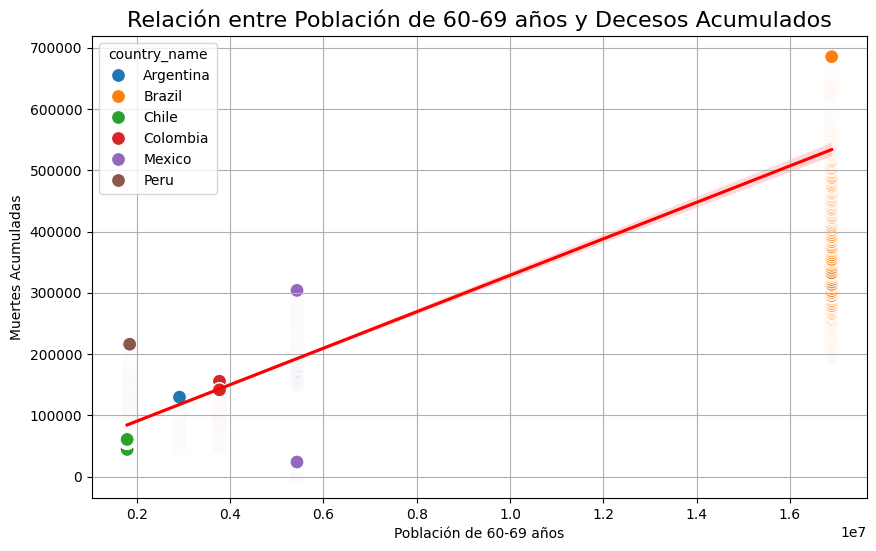

In [65]:
# Aumenta el tamaño de la figura para una mejor visualización
plt.figure(figsize=(10, 6))

# Crea el diagrama de dispersión para muertes acumuladas vs. población de 60-69 años
sns.scatterplot(data=df, x='population_age_60_69', y='cumulative_deceased', hue='country_name', s=100)

# Añade una línea de regresión para visualizar la tendencia
sns.regplot(data=df, x='population_age_60_69', y='cumulative_deceased', scatter=False, color='red')

# Personaliza el gráfico
plt.title('Relación entre Población de 60-69 años y Decesos Acumulados', fontsize=16)
plt.xlabel('Población de 60-69 años')
plt.ylabel('Muertes Acumuladas')
plt.grid(True)

plt.show()

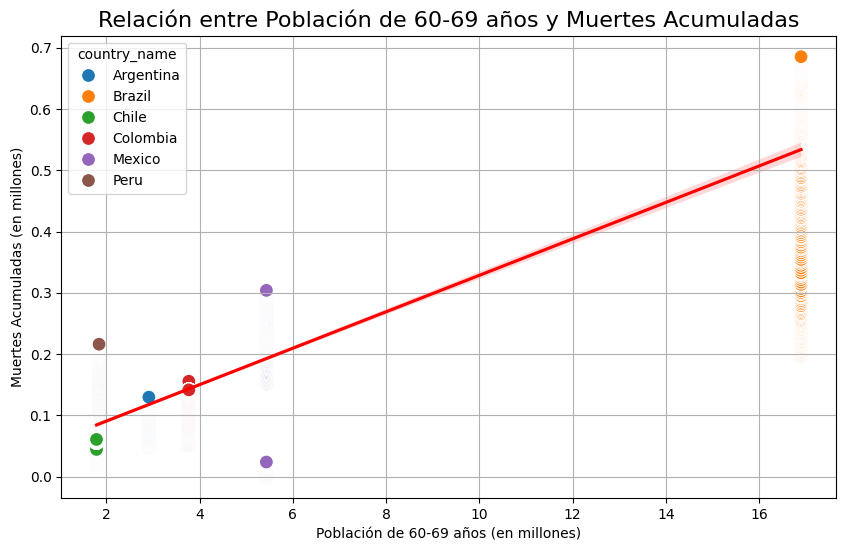

In [66]:
# Crea un DataFrame temporal con valores en millones para una mejor visualización
df_millones = df.copy()
df_millones['poblacion_age_60_69_millones'] = df_millones['population_age_60_69'] / 1_000_000
df_millones['cumulative_deceased_millones'] = df_millones['cumulative_deceased'] / 1_000_000

# Aumenta el tamaño de la figura para una mejor visualización
plt.figure(figsize=(10, 6))

# Crea el diagrama de dispersión usando el nuevo DataFrame
sns.scatterplot(data=df_millones, x='poblacion_age_60_69_millones', y='cumulative_deceased_millones', hue='country_name', s=100)

# Añade una línea de regresión para visualizar la tendencia
sns.regplot(data=df_millones, x='poblacion_age_60_69_millones', y='cumulative_deceased_millones', scatter=False, color='red')

# Personaliza el gráfico
plt.title('Relación entre Población de 60-69 años y Muertes Acumuladas', fontsize=16)
plt.xlabel('Población de 60-69 años (en millones)')
plt.ylabel('Muertes Acumuladas (en millones)')
plt.grid(True)

plt.show()

Tendencia positiva confirmada: El gráfico te muestra visualmente que la correlación es, en efecto, positiva. A mayor población en el rango de 60-69 años, mayor es el número de muertes acumuladas. La línea de regresión y la agrupación de puntos lo confirman.

Identificaste una anomalía crítica: La diferencia entre Perú y Chile es un hallazgo clave. Muestra que, a pesar de tener una población similar en ese grupo de edad, Perú tuvo un número de muertes mucho mayor. Esto nos indica que factores como la atención médica, la densidad poblacional, o las políticas de salud, pueden haber tenido un impacto significativo.

Brasil y México: Tus comentarios sobre el "rastro" de Brasil y los puntos de México sugieren que la situación en estos países fue muy volátil a lo largo del tiempo, con picos y valles que se ven reflejados en esos puntos de datos.

## Evolución de Casos Confirmados por Mes

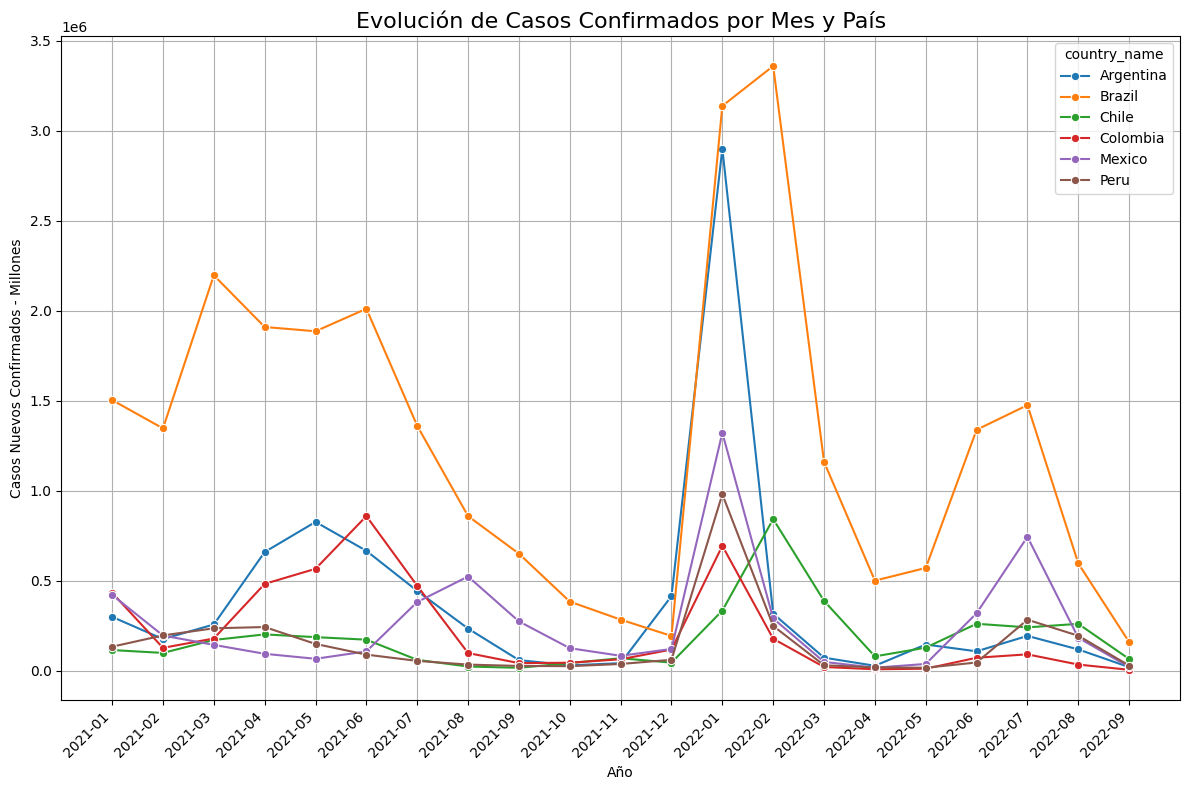

In [69]:
# 1. Aseguramos que la columna 'date' esté en formato de fecha
df['date'] = pd.to_datetime(df['date'])

# 2. Creamos una nueva columna para el mes y año
df['year_month'] = df['date'].dt.to_period('M')

# 3. Agrupamos los datos por país y por mes, sumando los casos confirmados
df_casos_mensuales = df.groupby(['country_name', 'year_month'])['new_confirmed'].sum().reset_index()

# 4. Ajustamos el formato de la columna de fecha para la visualización
df_casos_mensuales['new_confirmed_millones'] = df_casos_mensuales['new_confirmed'] / 1_000_000
df_casos_mensuales['year_month'] = df_casos_mensuales['year_month'].astype(str)

# 5. Creamos el gráfico de líneas
plt.figure(figsize=(12, 8))
sns.lineplot(data=df_casos_mensuales, x='year_month', y='new_confirmed', hue='country_name', marker='o')

# 6. Personalizamos el gráfico
plt.title('Evolución de Casos Confirmados por Mes y País', fontsize=16)
plt.xlabel('Año')
plt.ylabel('Casos Nuevos Confirmados - Millones')
plt.xticks(rotation=45, ha='right')
plt.grid(True)
plt.tight_layout() # Asegura que las etiquetas no se corten

plt.show()

Se identifican tres principales olas de la pandemia en la región.

Picos sincrónicos: La mayoría de los países experimentaron un gran pico a principios de 2022, lo que sugiere una variante del virus que se propagó rápidamente en toda la región 

Volatilidad de casos: El enorme pico de Argentina y el comportamiento sostenido de Brasil demuestran que las necesidades de recursos de cada país fueron muy diferentes. Brasil, en particular, parece haber tenido una carga de casos más alta a lo largo de todo el período.

Decensos: Fuertes decensos en diciembre y febrero, nos indica que el pico de enero pudo deberse a decuido de la población por fin de año.

## Muertes por mes de cada país.

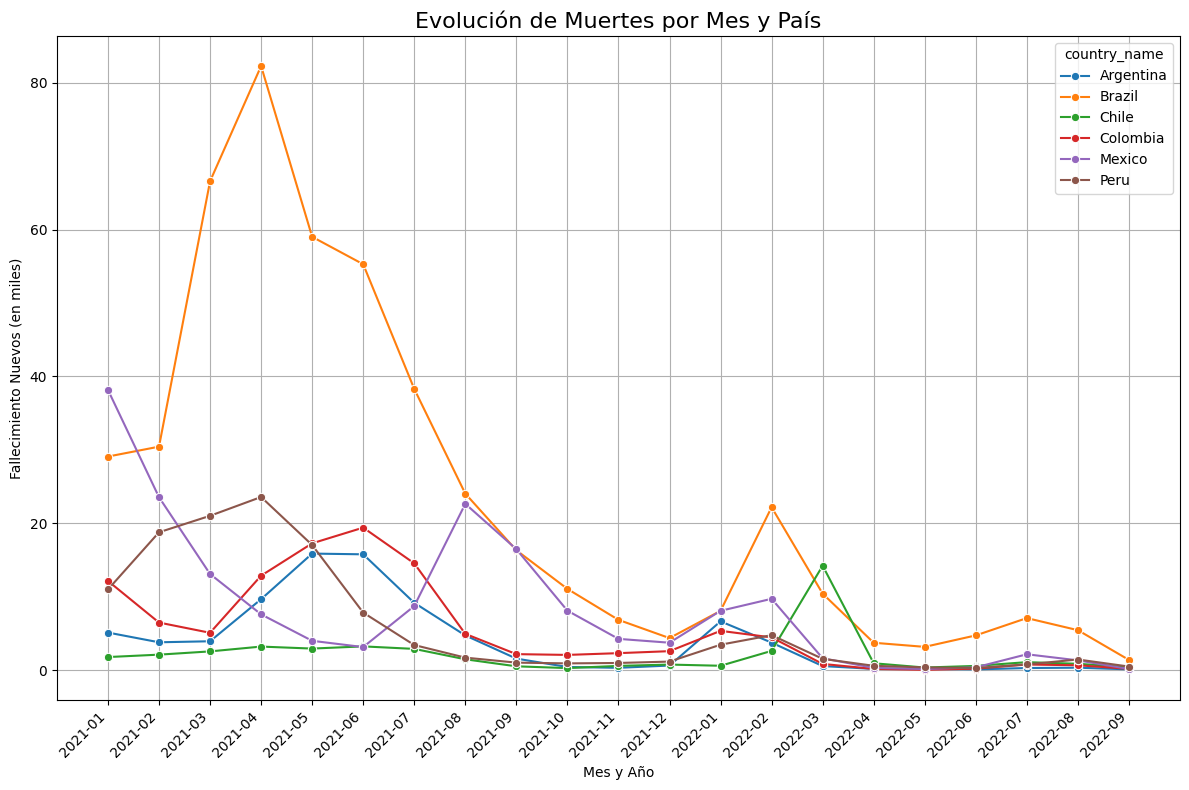

In [71]:
# 1. Aseguramos que la columna 'date' esté en formato de fecha
df['date'] = pd.to_datetime(df['date'])

# 2. Creamos una nueva columna para el mes y año
df['year_month'] = df['date'].dt.to_period('M')

# 3. Agrupamos los datos por país y por mes, sumando las nuevas muertes
df_muertes_mensuales = df.groupby(['country_name', 'year_month'])['new_deceased'].sum().reset_index()

# 4. Convertimos las muertes a miles para una mejor visualización
df_muertes_mensuales['new_deceased_miles'] = df_muertes_mensuales['new_deceased'] / 1_000

# 5. Ajustamos el formato de la columna de fecha para la visualización
df_muertes_mensuales['year_month'] = df_muertes_mensuales['year_month'].astype(str)

# 6. Creamos el gráfico de líneas
plt.figure(figsize=(12, 8))
sns.lineplot(data=df_muertes_mensuales, x='year_month', y='new_deceased_miles', hue='country_name', marker='o')

# 7. Personalizamos el gráfico
plt.title('Evolución de Muertes por Mes y País', fontsize=16)
plt.xlabel('Mes y Año')
plt.ylabel('Fallecimiento Nuevos (en miles)')
plt.xticks(rotation=45, ha='right')
plt.grid(True)
plt.tight_layout()

plt.show()

Se identifica que existe una relación entre los picos de casos nuevos confirmados y cantidad de decesos nuevos al mes siguiente de la identificación, claro ejemplo es el pico del 2021- 3 y se ve una alza de fallecimiento el 2021-4. Sucede similarmente en el mes de febrero y Marzo del 2022. 

Se identfiica que la cantidad de decesos a partir de abril hasta junio del 2022 fue mucho más controlada y minima. Esto plantea la hipótesis de que las campañas de vacunación o la inmunidad natural podrían haber tenido un impacto significativo.

Patrones únicos por país: Se identifica las curvas de U invertida de Perú, los picos de Colombia y México, y el comportamiento sostenido de Brasil. Cada patrón refleja la necesidad de una estrategia de salud pública adaptada a cada país.


## Diagrama de barras de la tasa de mortalidad masculina vs. femenina por país

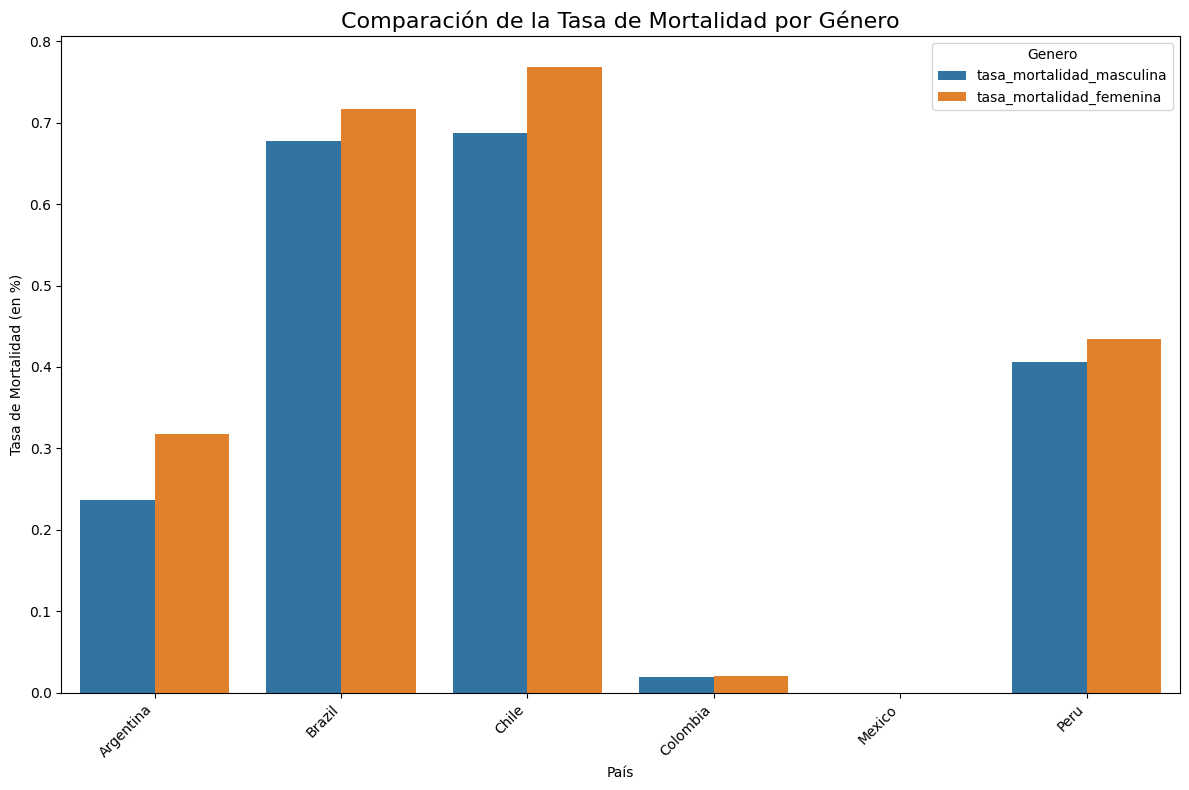

In [80]:
# --- 1. Preparación de los datos para la comparación de mortalidad por género ---
# Agrupamos los datos por país para obtener los valores finales de población y muertes
df_final_data = df.groupby('country_name').last().reset_index()

# Calculamos la tasa de mortalidad por género (muertes acumuladas / población de ese género)
df_final_data['tasa_mortalidad_femenina'] = (df_final_data['cumulative_deceased'] / df_final_data['population_female']) * 100
df_final_data['tasa_mortalidad_masculina'] = (df_final_data['cumulative_deceased'] / df_final_data['population_male']) * 100

# Creamos un DataFrame para la visualización del gráfico de barras
df_mortalidad_genero = pd.melt(df_final_data, id_vars=['country_name'],
                               value_vars=['tasa_mortalidad_masculina', 'tasa_mortalidad_femenina'],
                               var_name='Genero', value_name='Tasa de Mortalidad')

# --- 2. Creación del gráfico de barras ---
plt.figure(figsize=(12, 8))
# Usamos un diagrama de barras para comparar las tasas de mortalidad
sns.barplot(data=df_mortalidad_genero, x='country_name', y='Tasa de Mortalidad', hue='Genero')

# 3. Personalización del gráfico
plt.title('Comparación de la Tasa de Mortalidad por Género', fontsize=16)
plt.xlabel('País')
plt.ylabel('Tasa de Mortalidad (en %)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.show()

In [81]:
# Vamos a investigar porqué Mexico no tiene información: 

datos_mexico = df_final_data[df_final_data['country_name'] == 'Mexico']
print(datos_mexico[['country_name', 'cumulative_deceased', 'population_male', 'population_female']])

  country_name  cumulative_deceased  population_male  population_female
4       Mexico                  0.0           1402.0             1419.0


In [82]:
# No es posible que el cumulative deceseased sea 0.0, por ende vamos a pedir ver los datos de México.

import pandas as pd

# Filtramos el DataFrame 'df' para ver los datos de México
df_mexico = df[df['country_name'] == 'Mexico']

# Mostramos un resumen de las filas de la columna 'cumulative_deceased'
print(f"Resumen de la columna 'cumulative_deceased' para México:\n")

# Muestra el número de valores no nulos
print(f"Número de valores no nulos: {df_mexico['cumulative_deceased'].count()}")

# Muestra las primeras filas para ver el inicio de la serie
print("\nPrimeras filas de la columna 'cumulative_deceased':")
print(df_mexico['cumulative_deceased'].head())

# Muestra las últimas filas para ver el final de la serie
print("\nÚltimas filas de la columna 'cumulative_deceased':")
print(df_mexico['cumulative_deceased'].tail())

Resumen de la columna 'cumulative_deceased' para México:

Número de valores no nulos: 1558752

Primeras filas de la columna 'cumulative_deceased':
4792320    151435.0
4792321    152472.0
4792322    153584.0
4792323    154653.0
4792324    155813.0
Name: cumulative_deceased, dtype: float64

Últimas filas de la columna 'cumulative_deceased':
6351067    0.0
6351068    0.0
6351069    0.0
6351070    0.0
6351071    0.0
Name: cumulative_deceased, dtype: float64


/var/folders/fv/7k601zss3n73sc8f35_z6tnh0000gp/T/ipykernel_3877/1967554238.py:38: FutureWarning: DataFrameGroupBy.fillna is deprecated and will be removed in a future version. Use obj.ffill() or obj.bfill() for forward or backward filling instead. If you want to fill with a single value, use DataFrame.fillna instead
  df = df.groupby('country_name').fillna(method='ffill')
/var/folders/fv/7k601zss3n73sc8f35_z6tnh0000gp/T/ipykernel_3877/1967554238.py:38: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.groupby('country_name').fillna(method='ffill')
/var/folders/fv/7k601zss3n73sc8f35_z6tnh0000gp/T/ipykernel_3877/1967554238.py:39: FutureWarning: DataFrameGroupBy.fillna is deprecated and will be removed in a future version. Use obj.ffill() or obj.bfill() for forward or backward filling instead. If you want to fill with a single value, use DataFrame.fillna instead
  df = df.groupby('location_key'

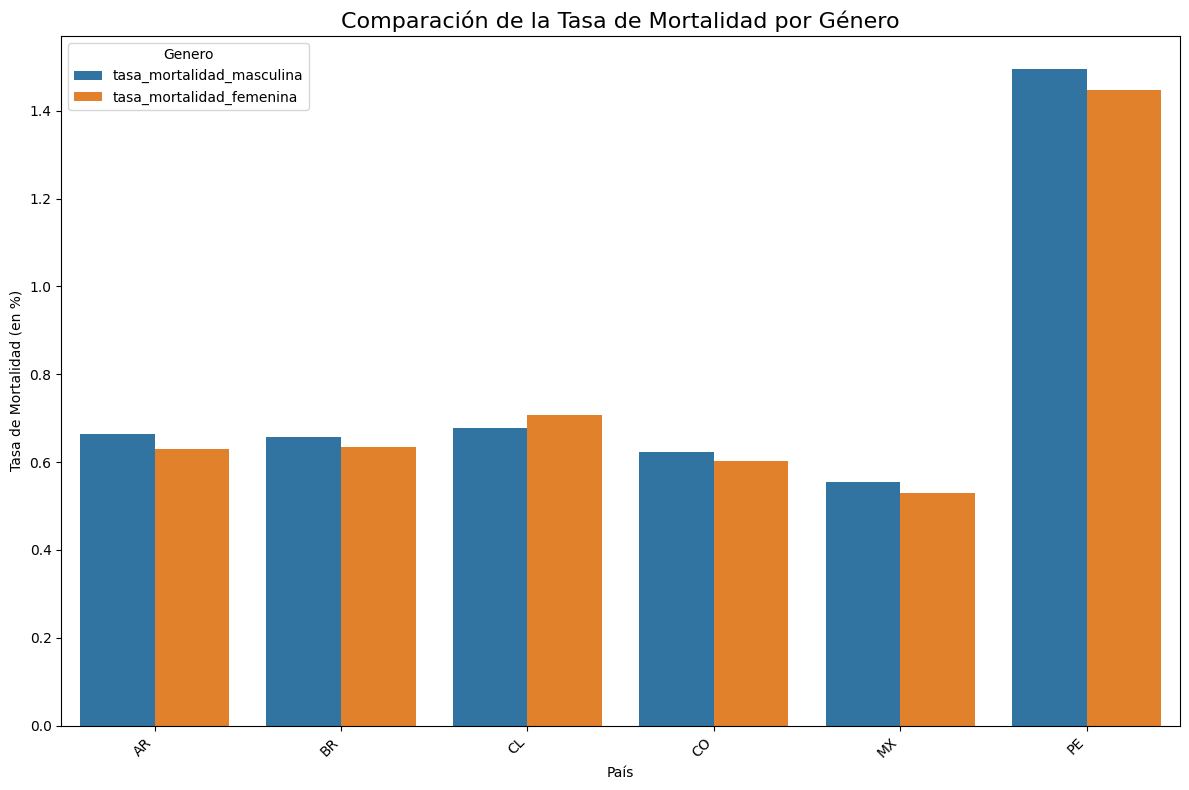

In [89]:
# Cómo Mexico si tiene datos, es posible que nuestra limpieza de nulos, hayamos propagado el 0.0 en lugar del dato. 
# Asi que lo corregiremos tomando el valor maximo de fallecimiento acumulado por pais para tratamiento de nulos.

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# --- 1. Carga de Datos Completa con las columnas corregidas y añadidas ---
cols_utiles = ['country_code', 'date', 'country_name', 'new_confirmed', 'location_key',
               'new_deceased', 'cumulative_confirmed', 'cumulative_deceased', 'population_male',
               'population_female', 'population', 'gdp_per_capita_usd', 'physicians_per_1000',
               'nurses_per_1000',
               'average_temperature_celsius', 'population_density', 'area_sq_km',
               'area_rural_sq_km', 'area_urban_sq_km', 'population_age_80_and_older',
               'population_age_20_29', 'population_age_30_39', 'population_age_40_49',
               'population_age_50_59', 'population_age_60_69', 'population_age_00_09',
               'cumulative_vaccine_doses_administered',
               'diabetes_prevalence',
               'smoking_prevalence'
               ]

paises_objetivo = ['CO', 'AR', 'CL', 'MX', 'PE', 'BR']
fecha_inicio = '2021-01-01'

chunks_filtrados = []
chunksize = 500_000
for chunk in pd.read_csv("data_latinoamerica.csv", usecols=cols_utiles, parse_dates=['date'], chunksize=chunksize):
    chunk_filtrado = chunk[
        (chunk['location_key'].isin(paises_objetivo)) &
        (chunk['date'] > fecha_inicio)
    ]
    chunks_filtrados.append(chunk_filtrado)
df = pd.concat(chunks_filtrados, ignore_index=True)


# --- 2. Preparación y Limpieza de Datos ---
df = df.groupby('country_name').fillna(method='ffill')
df = df.groupby('location_key').fillna(method='bfill')

df['poblacion_PEA'] = (df['population_age_20_29'] + df['population_age_30_39'] +
                       df['population_age_40_49'] + df['population_age_50_59'] +
                       df['population_age_60_69'])
df['poblacion_ninos'] = df['population_age_00_09']
df['poblacion_adultos_mayores'] = df['population_age_80_and_older']

def categorizar_temperatura(temp_celsius):
    if temp_celsius <= 10: return 'Frío'
    elif 10 < temp_celsius <= 25: return 'Templado'
    else: return 'Caluroso'
df['categoria_temperatura'] = df['average_temperature_celsius'].apply(categorizar_temperatura)

# --- 3. Visualización de la Tasa de Mortalidad por Género ---

# Agrupamos los datos por país para obtener los valores finales de población
# Para las muertes, tomamos el valor máximo para evitar el problema de los ceros
df_final_data = df.groupby('country_code').agg({
    'cumulative_deceased': 'max',  # <--- CAMBIO IMPORTANTE AQUÍ
    'population_male': 'last',
    'population_female': 'last'
}).reset_index()

df_final_data['tasa_mortalidad_femenina'] = (df_final_data['cumulative_deceased'] / df_final_data['population_female']) * 100
df_final_data['tasa_mortalidad_masculina'] = (df_final_data['cumulative_deceased'] / df_final_data['population_male']) * 100

df_mortalidad_genero = pd.melt(df_final_data, id_vars=['country_code'],
                               value_vars=['tasa_mortalidad_masculina', 'tasa_mortalidad_femenina'],
                               var_name='Genero', value_name='Tasa de Mortalidad')

plt.figure(figsize=(12, 8))
sns.barplot(data=df_mortalidad_genero, x='country_code', y='Tasa de Mortalidad', hue='Genero')

plt.title('Comparación de la Tasa de Mortalidad por Género', fontsize=16)
plt.xlabel('País')
plt.ylabel('Tasa de Mortalidad (en %)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.show()

Este grafico tiene mucho más sentido que el grafico previo, además tiene coherencia de porque en el grafico de Relación entre Población de 60-69 años y Muertes Acumuladas, Perú tiene el doble de muertes acumuladas que Chile.

## Boxplot de temperatura media de cada país.

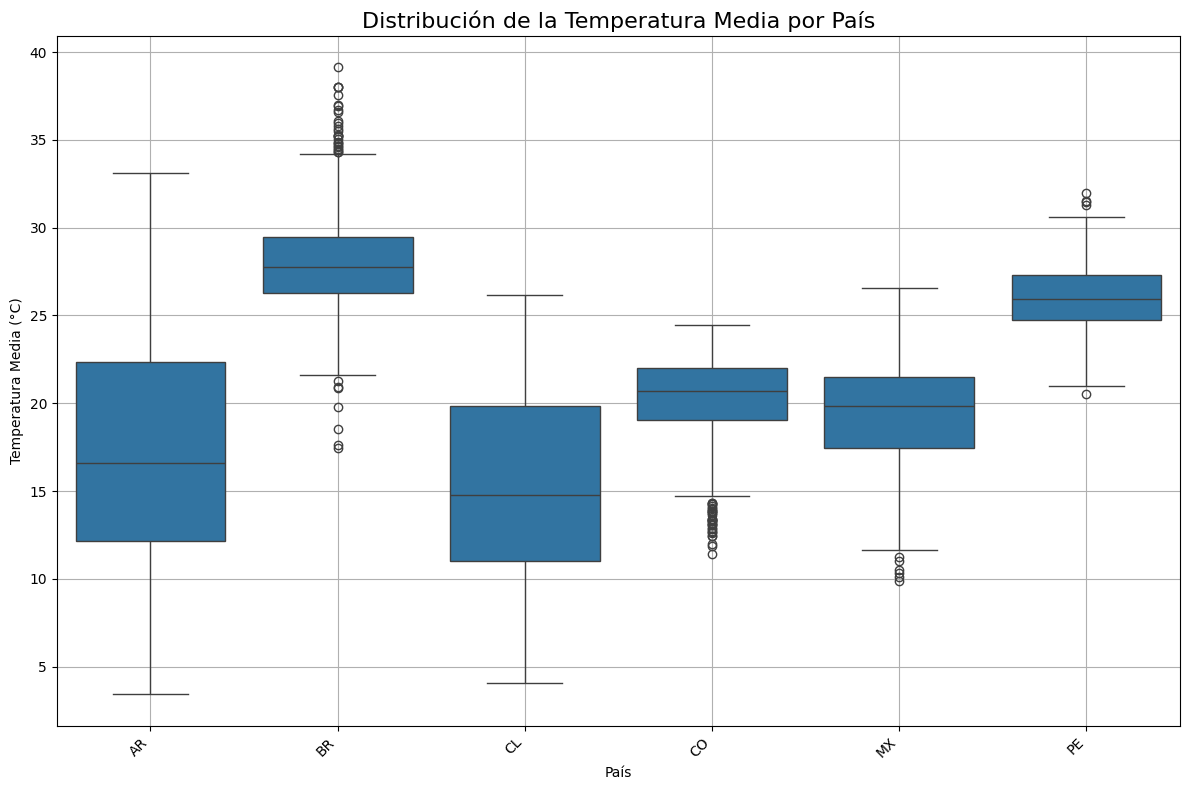

In [91]:
plt.figure(figsize=(12, 8))
# Usamos un boxplot para visualizar la distribución de la temperatura por país
sns.boxplot(data=df, x='country_code', y='average_temperature_celsius')

# 3. Personalización del gráfico
plt.title('Distribución de la Temperatura Media por País', fontsize=16)
plt.xlabel('País')
plt.ylabel('Temperatura Media (°C)')
plt.xticks(rotation=45, ha='right')
plt.grid(True)
plt.tight_layout()

plt.show()

 ## Diagrama de dispersión de la temperatura media contra los casos confirmados

  nos permitirá visualizar si hay una correlación entre la temperatura y el número de casos diarios.

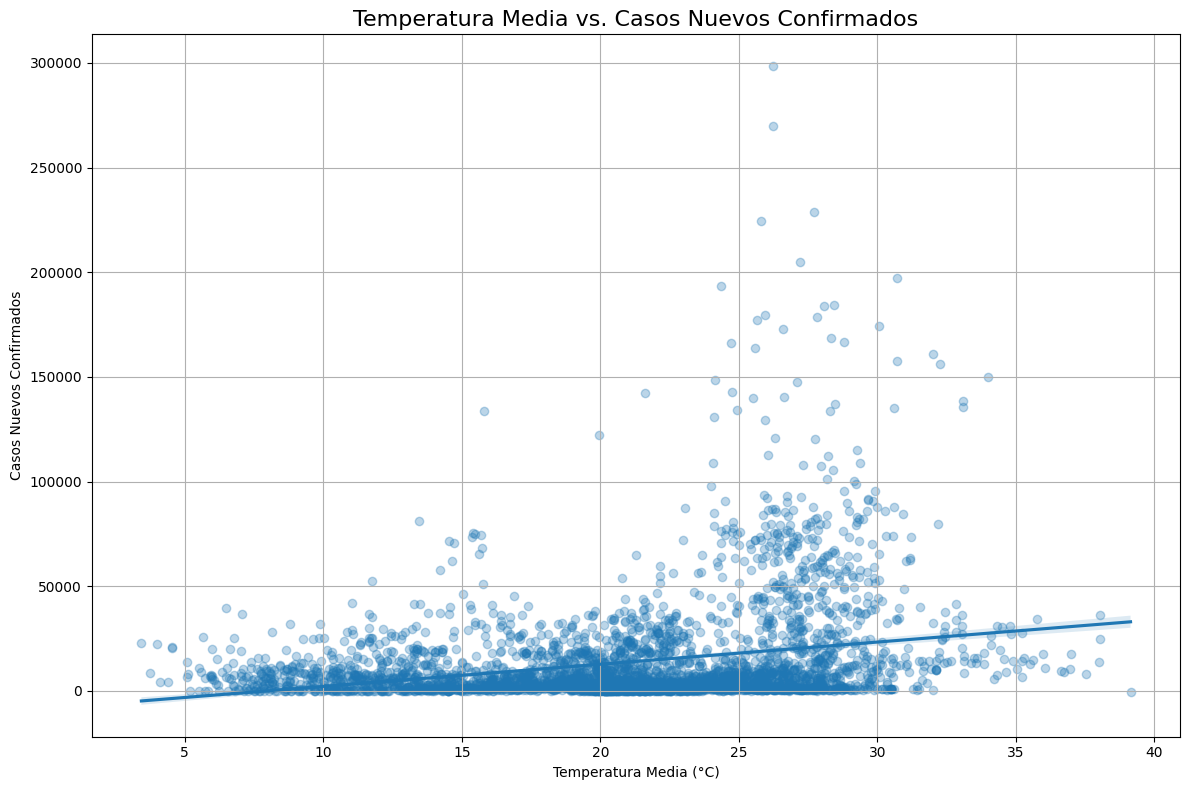

In [93]:
# --- Creación del Diagrama de Dispersión ---
plt.figure(figsize=(12, 8))
# Usamos un diagrama de dispersión para ver la relación entre temperatura y casos
sns.regplot(data=df, x='average_temperature_celsius', y='new_confirmed', scatter_kws={'alpha': 0.3})

# Personalizamos el gráfico
plt.title('Temperatura Media vs. Casos Nuevos Confirmados', fontsize=16)
plt.xlabel('Temperatura Media (°C)')
plt.ylabel('Casos Nuevos Confirmados')
plt.grid(True)
plt.tight_layout()

plt.show()

La línea de regresión en el gráfico es ligeramente creciente, lo que sugiere una correlación positiva entre la temperatura media y el número de casos nuevos. En general, a medida que la temperatura aumenta, el número de casos nuevos también tiende a aumentar

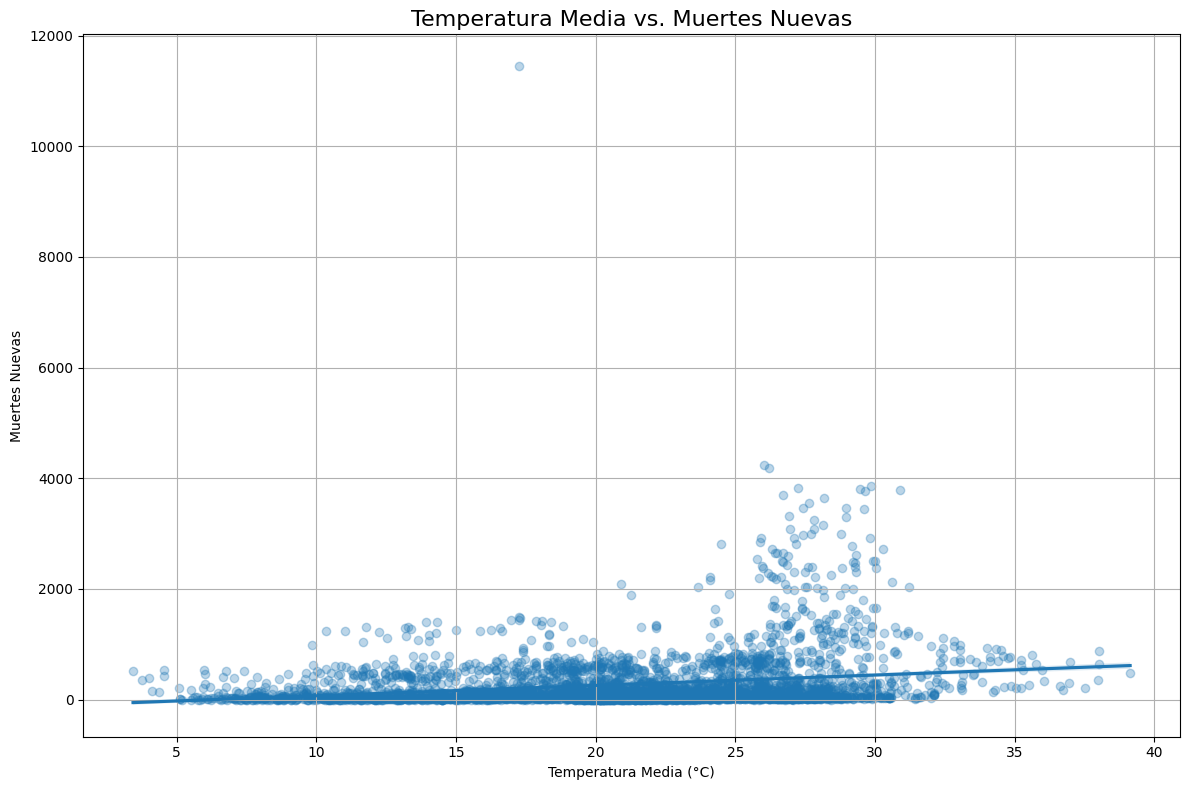

In [94]:
# --- Creación del Diagrama de Dispersión con Línea de Regresión ---
plt.figure(figsize=(12, 8))
# Usamos regplot para ver la relación entre temperatura y muertes
sns.regplot(data=df, x='average_temperature_celsius', y='new_deceased', scatter_kws={'alpha': 0.3})

# Personalizamos el gráfico
plt.title('Temperatura Media vs. Muertes Nuevas', fontsize=16)
plt.xlabel('Temperatura Media (°C)')
plt.ylabel('Muertes Nuevas')
plt.grid(True)
plt.tight_layout()

plt.show()

## Distribución de la población por grupos de edad

/var/folders/fv/7k601zss3n73sc8f35_z6tnh0000gp/T/ipykernel_3877/132772949.py:34: FutureWarning: DataFrameGroupBy.fillna is deprecated and will be removed in a future version. Use obj.ffill() or obj.bfill() for forward or backward filling instead. If you want to fill with a single value, use DataFrame.fillna instead
  df = df.groupby('country_code').fillna(method='ffill')
/var/folders/fv/7k601zss3n73sc8f35_z6tnh0000gp/T/ipykernel_3877/132772949.py:34: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.groupby('country_code').fillna(method='ffill')
/var/folders/fv/7k601zss3n73sc8f35_z6tnh0000gp/T/ipykernel_3877/132772949.py:35: FutureWarning: DataFrameGroupBy.fillna is deprecated and will be removed in a future version. Use obj.ffill() or obj.bfill() for forward or backward filling instead. If you want to fill with a single value, use DataFrame.fillna instead
  df = df.groupby('location_key').f

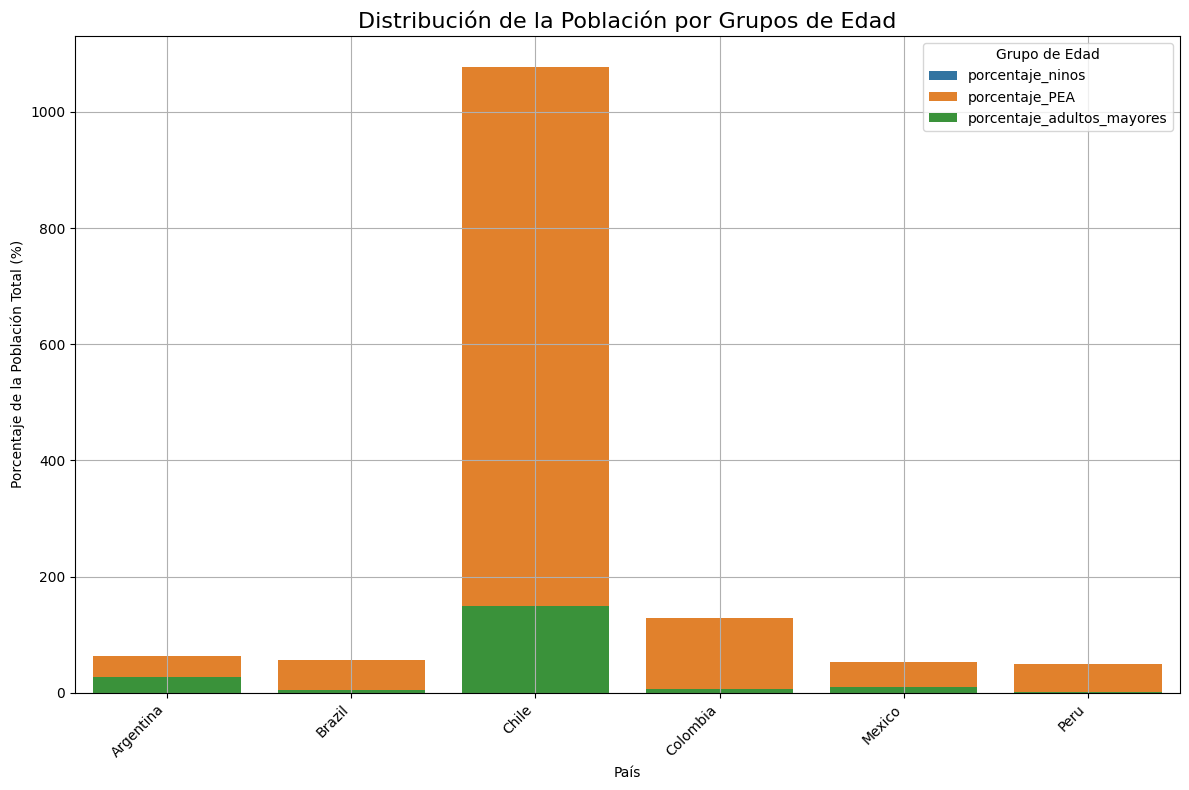

In [99]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# --- 1. Carga de Datos Completa ---
cols_utiles = ['country_code', 'date', 'country_name', 'new_confirmed', 'location_key',
               'new_deceased', 'cumulative_confirmed', 'cumulative_deceased', 'population_male',
               'population_female', 'population', 'gdp_per_capita_usd', 'physicians_per_1000',
               'nurses_per_1000',
               'average_temperature_celsius', 'population_density', 'area_sq_km',
               'area_rural_sq_km', 'area_urban_sq_km', 'population_age_80_and_older',
               'population_age_20_29', 'population_age_30_39', 'population_age_40_49',
               'population_age_50_59', 'population_age_60_69', 'population_age_00_09',
               'population_age_10_19', # <--- NUEVA COLUMNA
               'population_age_70_79' # <--- NUEVA COLUMNA
               ]

paises_objetivo = ['CO', 'AR', 'CL', 'MX', 'PE', 'BR']
fecha_inicio = '2021-01-01'

chunks_filtrados = []
chunksize = 500_000
for chunk in pd.read_csv("data_latinoamerica.csv", usecols=cols_utiles, parse_dates=['date'], chunksize=chunksize):
    chunk_filtrado = chunk[
        (chunk['country_code'].isin(paises_objetivo)) &
        (chunk['date'] > fecha_inicio)
    ]
    chunks_filtrados.append(chunk_filtrado)
df = pd.concat(chunks_filtrados, ignore_index=True)


# --- 2. Preparación y Limpieza de Datos ---
df = df.groupby('country_code').fillna(method='ffill')
df = df.groupby('location_key').fillna(method='bfill')

# Definimos los grupos de edad de manera CORRECTA
df['poblacion_ninos'] = df['population_age_00_09'] + df['population_age_10_19']
df['poblacion_PEA'] = (df['population_age_20_29'] + df['population_age_30_39'] +
                       df['population_age_40_49'] + df['population_age_50_59'] +
                       df['population_age_60_69'])
df['poblacion_adultos_mayores'] = df['population_age_70_79'] + df['population_age_80_and_older']

def categorizar_temperatura(temp_celsius):
    if temp_celsius <= 10: return 'Frío'
    elif 10 < temp_celsius <= 25: return 'Templado'
    else: return 'Caluroso'
df['categoria_temperatura'] = df['average_temperature_celsius'].apply(categorizar_temperatura)


# --- 3. Creación del gráfico de distribución de la población ---
df_poblacion_grupos = df.groupby('country_name').last().reset_index()

df_poblacion_grupos['porcentaje_ninos'] = (df_poblacion_grupos['poblacion_ninos'] / df_poblacion_grupos['population']) * 100
df_poblacion_grupos['porcentaje_PEA'] = (df_poblacion_grupos['poblacion_PEA'] / df_poblacion_grupos['population']) * 100
df_poblacion_grupos['porcentaje_adultos_mayores'] = (df_poblacion_grupos['poblacion_adultos_mayores'] / df_poblacion_grupos['population']) * 100

df_porcentajes = df_poblacion_grupos[['country_name', 'porcentaje_ninos', 'porcentaje_PEA', 'porcentaje_adultos_mayores']]
df_porcentajes = df_porcentajes.melt('country_name', var_name='Grupo de Edad', value_name='Porcentaje')

plt.figure(figsize=(12, 8))
sns.barplot(data=df_porcentajes, x='country_name', y='Porcentaje', hue='Grupo de Edad', dodge=False)

plt.title('Distribución de la Población por Grupos de Edad', fontsize=16)
plt.xlabel('País')
plt.ylabel('Porcentaje de la Población Total (%)')
plt.xticks(rotation=45, ha='right')
plt.grid(True)
plt.tight_layout()

plt.show()

In [100]:
# El grafico nos muestra un error en posiblemente datos en Chile
# Veremos la tabla completa que se usó para generar el gráfico de población
print("Tabla de datos de población por grupo de edad:")
print(df_poblacion_grupos[['country_name', 'population', 'poblacion_ninos', 'poblacion_PEA', 'poblacion_adultos_mayores', 'porcentaje_ninos', 'porcentaje_PEA', 'porcentaje_adultos_mayores']])

Tabla de datos de población por grupo de edad:
  country_name  population  poblacion_ninos  poblacion_PEA  \
0    Argentina      5158.0           1775.0         3232.0   
1       Brazil     11484.0           4503.0         6399.0   
2        Chile    126548.0         528220.0      1363085.0   
3     Colombia     43138.0          40639.0        55880.0   
4       Mexico      2818.0           1047.0         1488.0   
5         Peru      2860.0           1370.0         1435.0   

   poblacion_adultos_mayores  porcentaje_ninos  porcentaje_PEA  \
0                     1401.0         34.412563       62.659946   
1                      582.0         39.211076       55.721003   
2                   189600.0        417.406834     1077.128836   
3                     2710.0         94.206964      129.537763   
4                      283.0         37.154010       52.803407   
5                       55.0         47.902098       50.174825   

   porcentaje_adultos_mayores  
0                   27.

/var/folders/fv/7k601zss3n73sc8f35_z6tnh0000gp/T/ipykernel_3877/1198225252.py:36: FutureWarning: DataFrameGroupBy.fillna is deprecated and will be removed in a future version. Use obj.ffill() or obj.bfill() for forward or backward filling instead. If you want to fill with a single value, use DataFrame.fillna instead
  df = df.groupby('country_code').fillna(method='ffill')
/var/folders/fv/7k601zss3n73sc8f35_z6tnh0000gp/T/ipykernel_3877/1198225252.py:36: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.groupby('country_code').fillna(method='ffill')
/var/folders/fv/7k601zss3n73sc8f35_z6tnh0000gp/T/ipykernel_3877/1198225252.py:37: FutureWarning: DataFrameGroupBy.fillna is deprecated and will be removed in a future version. Use obj.ffill() or obj.bfill() for forward or backward filling instead. If you want to fill with a single value, use DataFrame.fillna instead
  df = df.groupby('location_key'

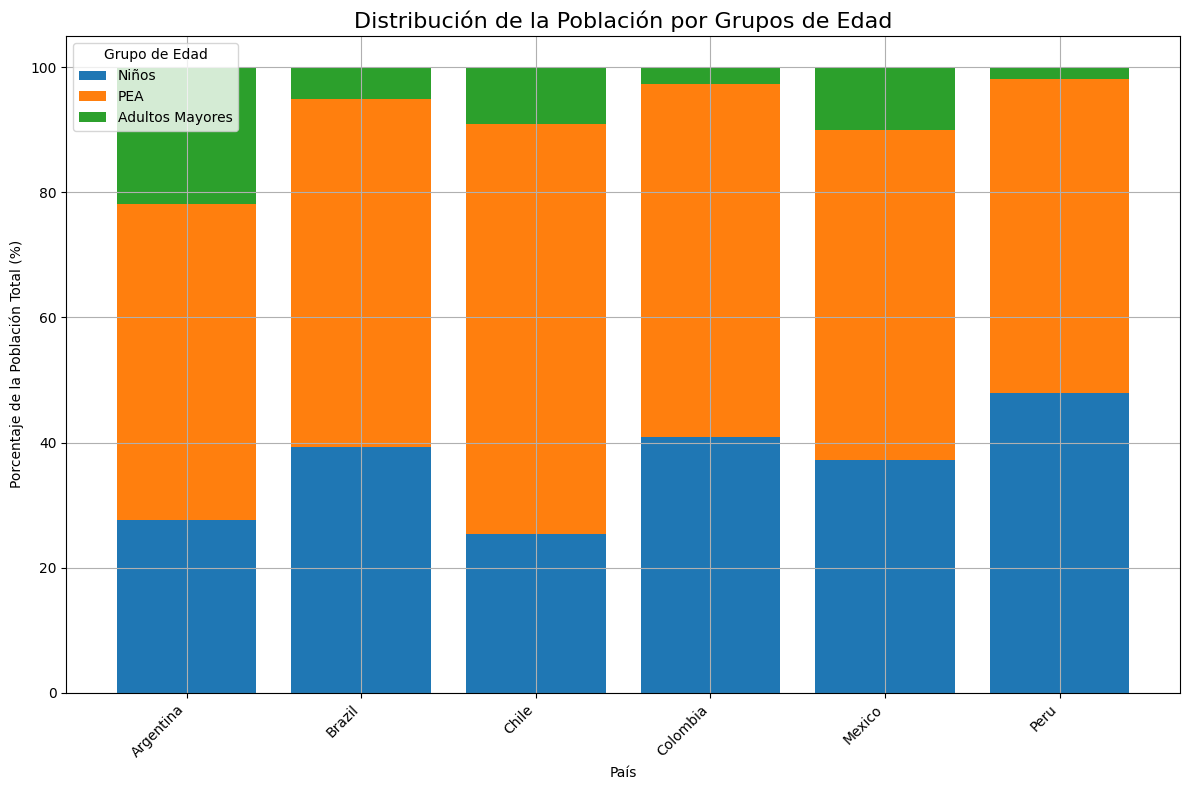

In [104]:
# El monto de population es menor a los montos de población por cada grupo, por ende, tomaremos la suma de cada columna por separado.

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# --- 1. Carga y preparación de los datos (lo mismo que antes) ---
cols_utiles = ['country_code', 'date', 'country_name', 'new_confirmed', 'location_key',
               'new_deceased', 'cumulative_confirmed', 'cumulative_deceased', 'population_male',
               'population_female', 'population', 'gdp_per_capita_usd', 'physicians_per_1000',
               'nurses_per_1000',
               'average_temperature_celsius', 'population_density', 'area_sq_km',
               'area_rural_sq_km', 'area_urban_sq_km', 'population_age_80_and_older',
               'population_age_20_29', 'population_age_30_39', 'population_age_40_49',
               'population_age_50_59', 'population_age_60_69', 'population_age_00_09',
               'population_age_10_19',
               'population_age_70_79'
               ]

paises_objetivo = ['CO', 'AR', 'CL', 'MX', 'PE', 'BR']
fecha_inicio = '2021-01-01'

chunks_filtrados = []
chunksize = 500_000
for chunk in pd.read_csv("data_latinoamerica.csv", usecols=cols_utiles, parse_dates=['date'], chunksize=chunksize):
    chunk_filtrado = chunk[
        (chunk['country_code'].isin(paises_objetivo)) &
        (chunk['date'] > fecha_inicio)
    ]
    chunks_filtrados.append(chunk_filtrado)
df = pd.concat(chunks_filtrados, ignore_index=True)


# --- 2. Preparación y Limpieza de Datos ---
df = df.groupby('country_code').fillna(method='ffill')
df = df.groupby('location_key').fillna(method='bfill')

df['poblacion_ninos'] = df['population_age_00_09'] + df['population_age_10_19']
df['poblacion_PEA'] = (df['population_age_20_29'] + df['population_age_30_39'] +
                       df['population_age_40_49'] + df['population_age_50_59'] +
                       df['population_age_60_69'])
df['poblacion_adultos_mayores'] = df['population_age_70_79'] + df['population_age_80_and_older']

def categorizar_temperatura(temp_celsius):
    if temp_celsius <= 10: return 'Frío'
    elif 10 < temp_celsius <= 25: return 'Templado'
    else: return 'Caluroso'
df['categoria_temperatura'] = df['average_temperature_celsius'].apply(categorizar_temperatura)

# --- 3. Creación del gráfico de distribución de la población (CORREGIDO) ---
df_poblacion_grupos = df.groupby('country_name').last().reset_index()

df_poblacion_grupos['poblacion_total_calculada'] = (df_poblacion_grupos['poblacion_ninos'] +
                                                     df_poblacion_grupos['poblacion_PEA'] +
                                                     df_poblacion_grupos['poblacion_adultos_mayores'])

df_poblacion_grupos['porcentaje_ninos'] = (df_poblacion_grupos['poblacion_ninos'] / df_poblacion_grupos['poblacion_total_calculada']) * 100
df_poblacion_grupos['porcentaje_PEA'] = (df_poblacion_grupos['poblacion_PEA'] / df_poblacion_grupos['poblacion_total_calculada']) * 100
df_poblacion_grupos['porcentaje_adultos_mayores'] = (df_poblacion_grupos['poblacion_adultos_mayores'] / df_poblacion_grupos['poblacion_total_calculada']) * 100

plt.figure(figsize=(12, 8))
paises = df_poblacion_grupos['country_name']
x_indices = range(len(paises))

plt.bar(x_indices, df_poblacion_grupos['porcentaje_ninos'], label='Niños')
plt.bar(x_indices, df_poblacion_grupos['porcentaje_PEA'], bottom=df_poblacion_grupos['porcentaje_ninos'], label='PEA')
plt.bar(x_indices, df_poblacion_grupos['porcentaje_adultos_mayores'], bottom=df_poblacion_grupos['porcentaje_ninos'] + df_poblacion_grupos['porcentaje_PEA'], label='Adultos Mayores')

plt.title('Distribución de la Población por Grupos de Edad', fontsize=16)
plt.xlabel('País')
plt.ylabel('Porcentaje de la Población Total (%)')
plt.xticks(x_indices, paises, rotation=45, ha='right')
plt.legend(title='Grupo de Edad')
plt.grid(True)
plt.tight_layout()

plt.show()

# Avance 3

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## Evolución Semanal de Casos Nuevos

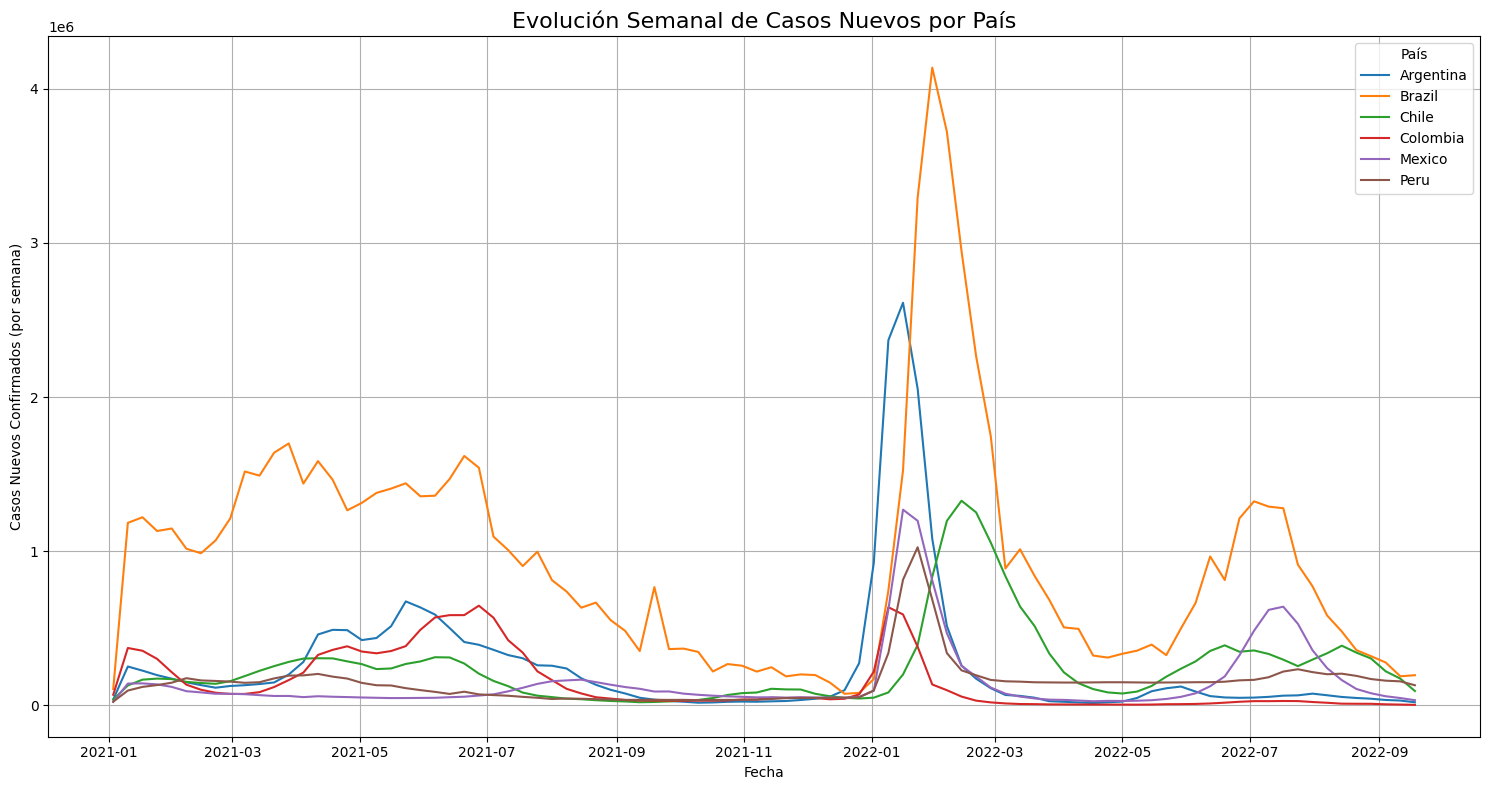

In [8]:
# Agrupamos por fecha y país y sumamos los casos nuevos
df_casos_semanales = df.groupby(['date', 'country_name'])['new_confirmed'].sum().reset_index()

# Re-muestreamos los datos para que sean semanales
df_casos_semanales['date'] = pd.to_datetime(df_casos_semanales['date'])
df_casos_semanales.set_index('date', inplace=True)
df_casos_semanales = df_casos_semanales.groupby('country_name').resample('W')['new_confirmed'].sum().reset_index()

# Generamos el gráfico de líneas
plt.figure(figsize=(15, 8))
sns.lineplot(data=df_casos_semanales, x='date', y='new_confirmed', hue='country_name')

plt.title('Evolución Semanal de Casos Nuevos por País', fontsize=16)
plt.xlabel('Fecha')
plt.ylabel('Casos Nuevos Confirmados (por semana)')
plt.grid(True)
plt.legend(title='País')
plt.tight_layout()

plt.show()

Si queremos visualizar datos en los picos

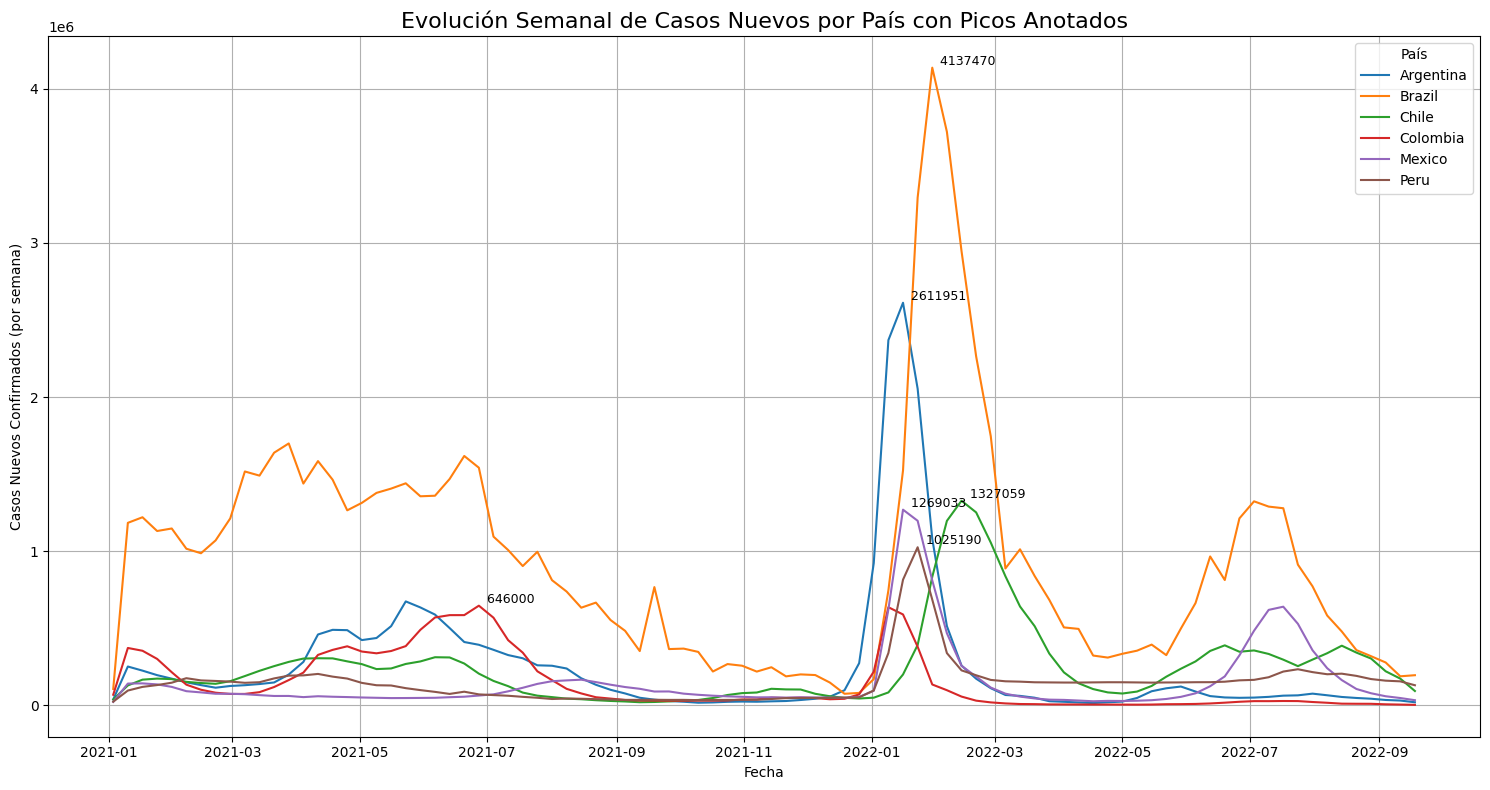

In [10]:
# --- 3. Creación del gráfico de evolución semanal de casos ---
# Agrupamos por fecha y país y sumamos los casos nuevos
df_casos_semanales = df.groupby(['date', 'country_name'])['new_confirmed'].sum().reset_index()
df_casos_semanales['date'] = pd.to_datetime(df_casos_semanales['date'])
df_casos_semanales.set_index('date', inplace=True)
df_casos_semanales = df_casos_semanales.groupby('country_name').resample('W')['new_confirmed'].sum().reset_index()


# Generamos el gráfico de líneas
plt.figure(figsize=(15, 8))
sns.lineplot(data=df_casos_semanales, x='date', y='new_confirmed', hue='country_name')

# --- 4. Añadimos las anotaciones de los picos ---
for pais in df_casos_semanales['country_name'].unique():
    df_pais = df_casos_semanales[df_casos_semanales['country_name'] == pais]
    
    # Encontramos el punto de valor máximo para ese país
    pico_casos = df_pais['new_confirmed'].max()
    pico_fecha = df_pais[df_pais['new_confirmed'] == pico_casos]['date'].iloc[0]
    
    # Añadimos la anotación en el gráfico
    plt.text(pico_fecha, pico_casos, 
             f"  {pico_casos:.0f}",  # Formateamos el texto para que se vea bien
             horizontalalignment='left',
             verticalalignment='bottom',
             fontsize=9,
             color='black')

# 5. Personalización del gráfico
plt.title('Evolución Semanal de Casos Nuevos por País con Picos Anotados', fontsize=16)
plt.xlabel('Fecha')
plt.ylabel('Casos Nuevos Confirmados (por semana)')
plt.grid(True)
plt.legend(title='País')
plt.tight_layout()

plt.show()

Variación mensual de casos y muertes

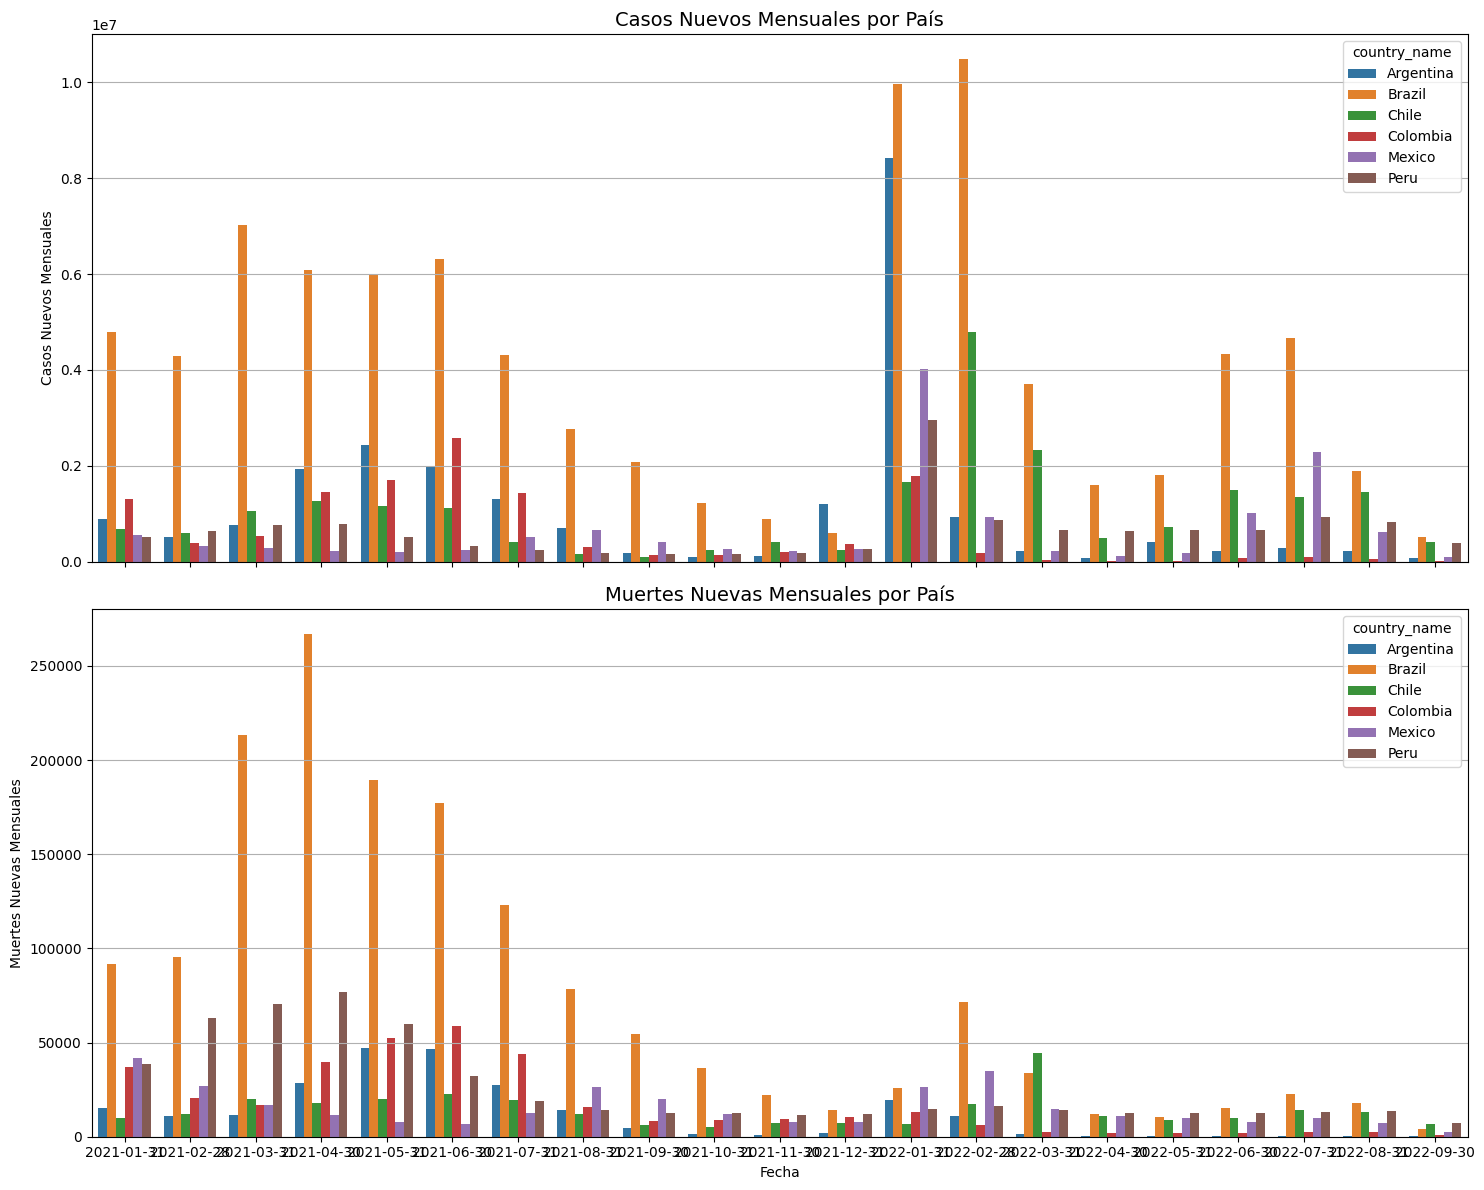

In [12]:

fig, axes = plt.subplots(2, 1, figsize=(15, 12), sharex=True)
sns.barplot(data=df_casos_mensuales, x='date', y='new_confirmed', hue='country_name', ax=axes[0], dodge=True)
axes[0].set_title('Casos Nuevos Mensuales por País', fontsize=14)
axes[0].set_ylabel('Casos Nuevos Mensuales')
axes[0].set_xlabel('')
axes[0].grid(axis='y')

sns.barplot(data=df_muertes_mensuales, x='date', y='new_deceased', hue='country_name', ax=axes[1], dodge=True)
axes[1].set_title('Muertes Nuevas Mensuales por País', fontsize=14)
axes[1].set_ylabel('Muertes Nuevas Mensuales')
axes[1].set_xlabel('Fecha')
axes[1].grid(axis='y')
plt.tight_layout()
plt.show()


Evolución Anual de Casos Nuevos

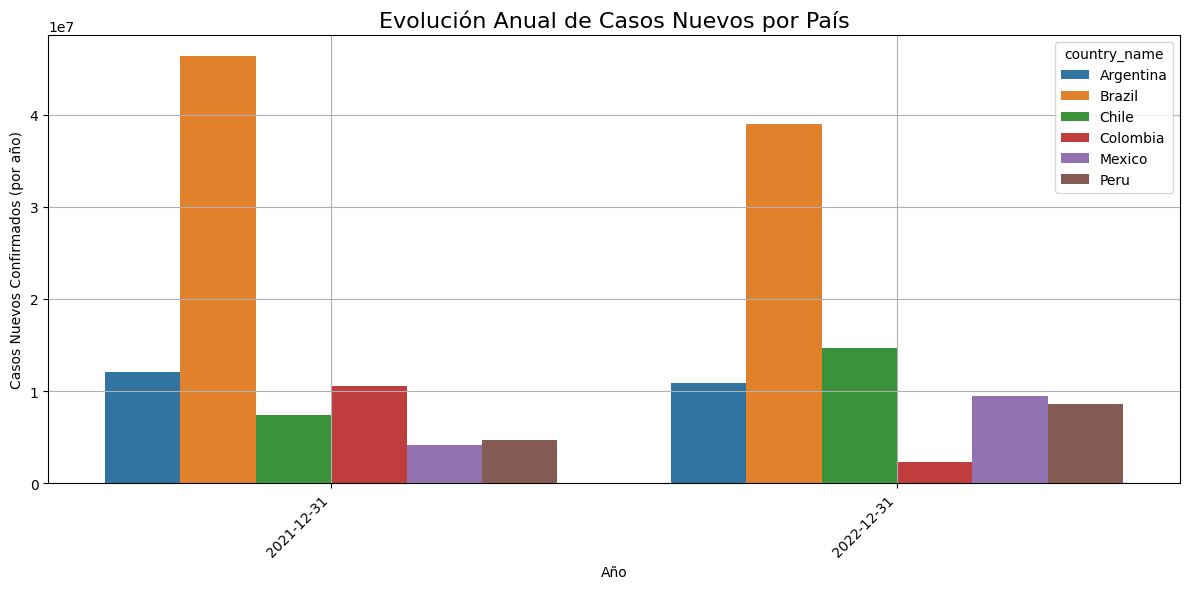

In [14]:
plt.figure(figsize=(12, 6))
sns.barplot(data=df_casos_anuales, x='date', y='new_confirmed', hue='country_name')
plt.title('Evolución Anual de Casos Nuevos por País', fontsize=16)
plt.xlabel('Año')
plt.ylabel('Casos Nuevos Confirmados (por año)')
plt.xticks(rotation=45, ha='right')
plt.grid(True)
plt.tight_layout()
plt.show()

Impacto de la Urbanización (Densidad Poblacional)

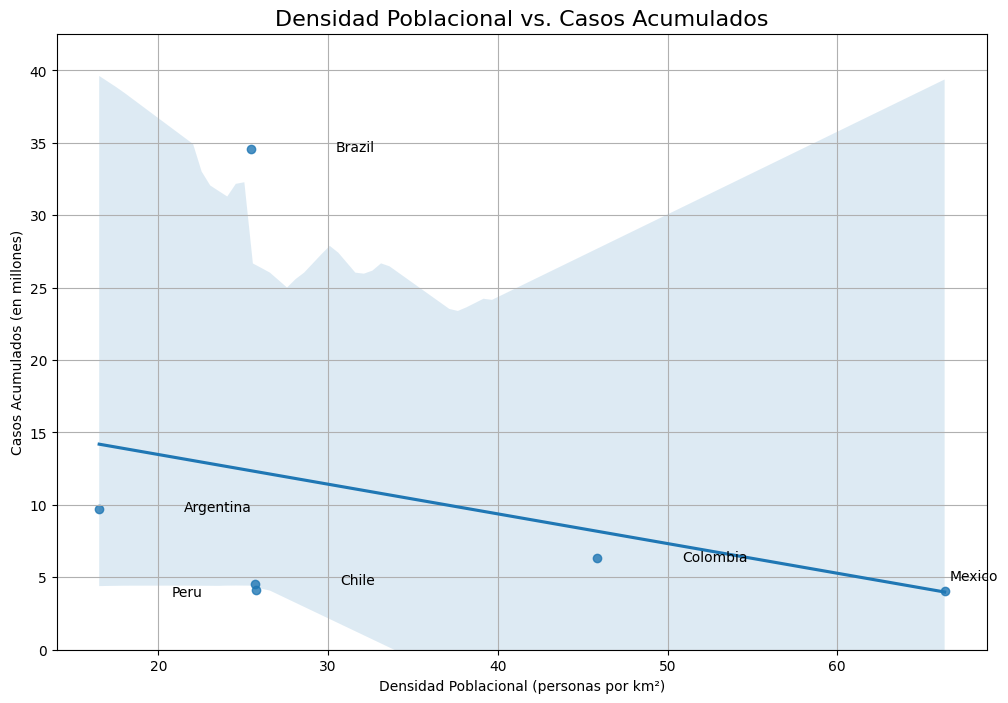

In [41]:

# Preparamos los datos para el gráfico
df_final_data = df.groupby('country_name').agg({
    'cumulative_confirmed': 'max',
    'population_density': 'last'
}).reset_index()

# eje Y: Convertimos los casos acumulados a millones
df_final_data['cumulative_confirmed_millones'] = df_final_data['cumulative_confirmed'] / 1_000_000

plt.figure(figsize=(12, 8))
# Usamos los datos en millones para la visualización
sns.regplot(data=df_final_data, x='population_density', y='cumulative_confirmed_millones')

etiquetas_offset = {
    'Chile': (5, 0.2),
    'Peru': (-5, -0.2),
    'Mexico': (0.3, 1)
}

for i in range(df_final_data.shape[0]):
    pais = df_final_data['country_name'][i]
    x_offset, y_offset = etiquetas_offset.get(pais, (5, 0.1))
    plt.text(
        df_final_data['population_density'][i] + x_offset, 
        df_final_data['cumulative_confirmed_millones'][i] + y_offset, 
        pais,
        ha='left',
        va='center',
        fontsize=10
    )

plt.title('Densidad Poblacional vs. Casos Acumulados', fontsize=16)
plt.xlabel('Densidad Poblacional (personas por km²)')
plt.ylabel('Casos Acumulados (en millones)')
plt.grid(True)

# ---> CORRECCIÓN CLAVE: Forzamos al eje Y a comenzar en 0
plt.ylim(ymin=0)

plt.show()


la línea tiene una pendiente ligeramente descendente. Esto sugiere una correlación negativa débil: a mayor densidad de población, se observa una tendencia a tener un número ligeramente menor de casos acumulados.

Sin embargo, considero que Brazil es un caso atipico como tal ya que para su densidad, tuvo un número de casos acumulados mucho mayor de lo que la tendencia predeciría. 

Correlación entre Personal Médico y Muertes

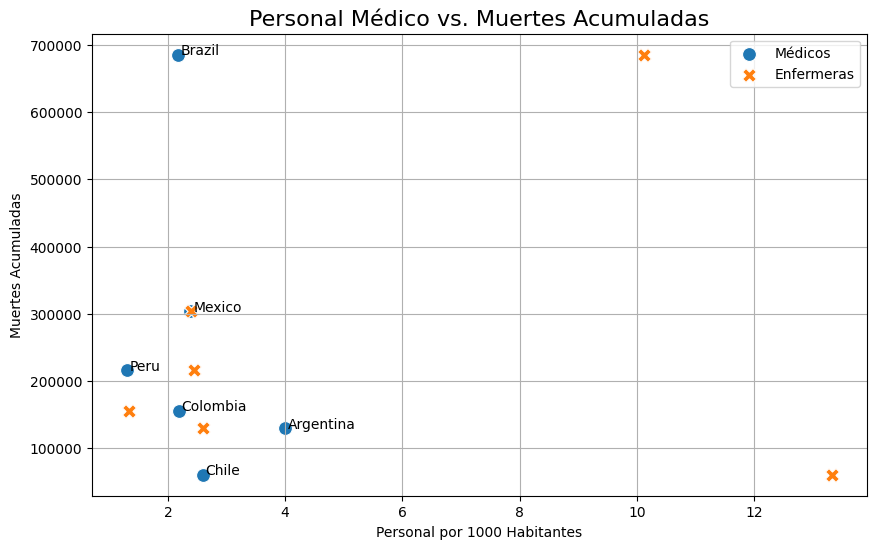

In [42]:
df_personal_medico = df.groupby('country_name').agg({
    'cumulative_deceased': 'max',
    'physicians_per_1000': 'last',
    'nurses_per_1000': 'last'
}).reset_index()

fig, ax = plt.subplots(figsize=(10, 6))
sns.scatterplot(data=df_personal_medico, x='physicians_per_1000', y='cumulative_deceased', label='Médicos', s=100)
sns.scatterplot(data=df_personal_medico, x='nurses_per_1000', y='cumulative_deceased', label='Enfermeras', s=100, marker='X')
for i in range(df_personal_medico.shape[0]):
    plt.text(df_personal_medico['physicians_per_1000'][i] + 0.05, df_personal_medico['cumulative_deceased'][i], df_personal_medico['country_name'][i])
plt.title('Personal Médico vs. Muertes Acumuladas', fontsize=16)
plt.xlabel('Personal por 1000 Habitantes')
plt.ylabel('Muertes Acumuladas')
plt.grid(True)
plt.legend()
plt.show()

Con este grafico, intentamos saber si hay una relación que entre más personal médico hay menos muertes

Círculos Azules: Representan la correlación entre los médicos por 1000 habitantes y las muertes acumuladas.
Cruces Naranjas: Representan la correlación entre las enfermeras por 1000 habitantes y las muertes acumuladas

Insights
. Chile menos muertes por la cantidad de enfermeras (+12 por cada 1000 habitantes)
. Brazil tiene una cantidad de muertes muy grande por su población
. La cantidad de enfermeras es crucial para disminuir la cantidad de muertes por pais. 

Nuevos casos y temperatura promedio 

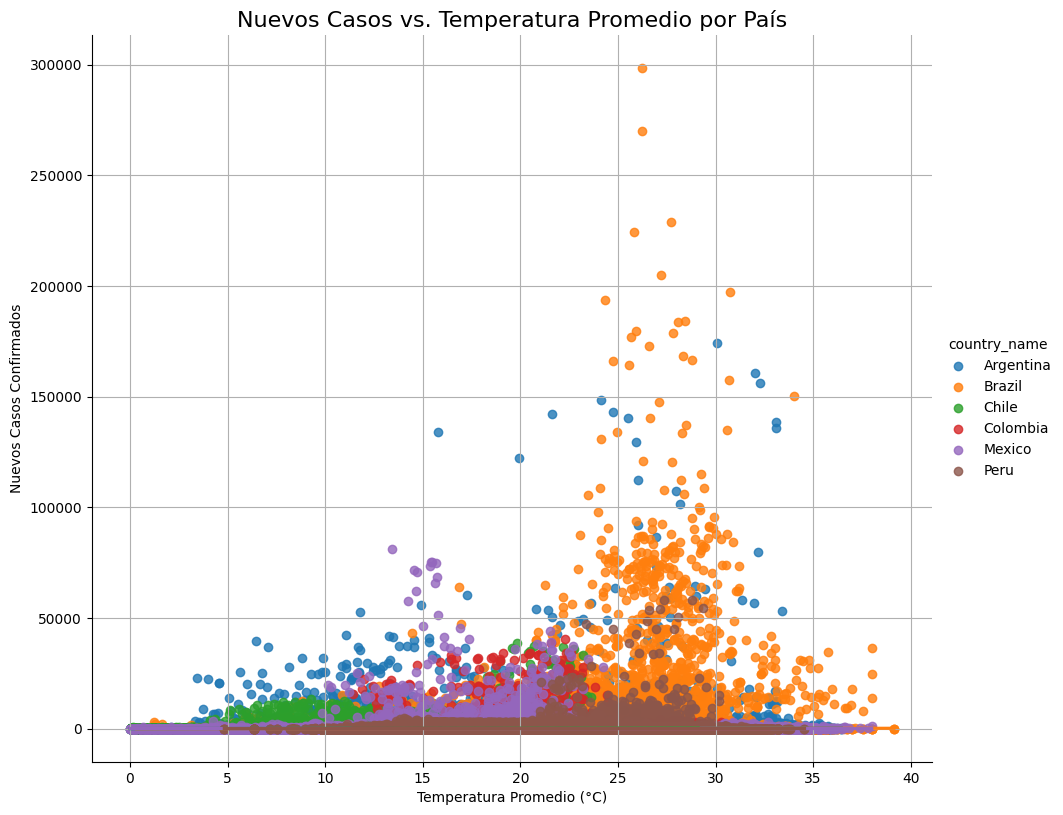

In [49]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Asumimos que el DataFrame principal 'df' ya está cargado y preparado.

# 1. Preparamos y limpiamos los datos para el gráfico
df_temp_casos = df[['country_name', 'new_confirmed', 'average_temperature_celsius']].dropna()
df_temp_casos = df_temp_casos[df_temp_casos['new_confirmed'] > 0]

# Filtramos valores de temperatura no realistas para América Latina
df_temp_casos = df_temp_casos[(df_temp_casos['average_temperature_celsius'] > 0) & (df_temp_casos['average_temperature_celsius'] < 40)]
df_temp_casos = df_temp_casos.reset_index(drop=True)

# 2. Creamos un nuevo gráfico usando lmplot para tener una línea de regresión por país
# Esto nos ayuda a ver si hay tendencias específicas en cada país.
sns.lmplot(data=df_temp_casos, x='average_temperature_celsius', y='new_confirmed', hue='country_name', height=8, aspect=1.2)

# 3. Añadimos etiquetas y título
plt.title('Nuevos Casos vs. Temperatura Promedio por País', fontsize=16)
plt.xlabel('Temperatura Promedio (°C)')
plt.ylabel('Nuevos Casos Confirmados')
plt.grid(True)
plt.show()


Tasa de Crecimiento (%)

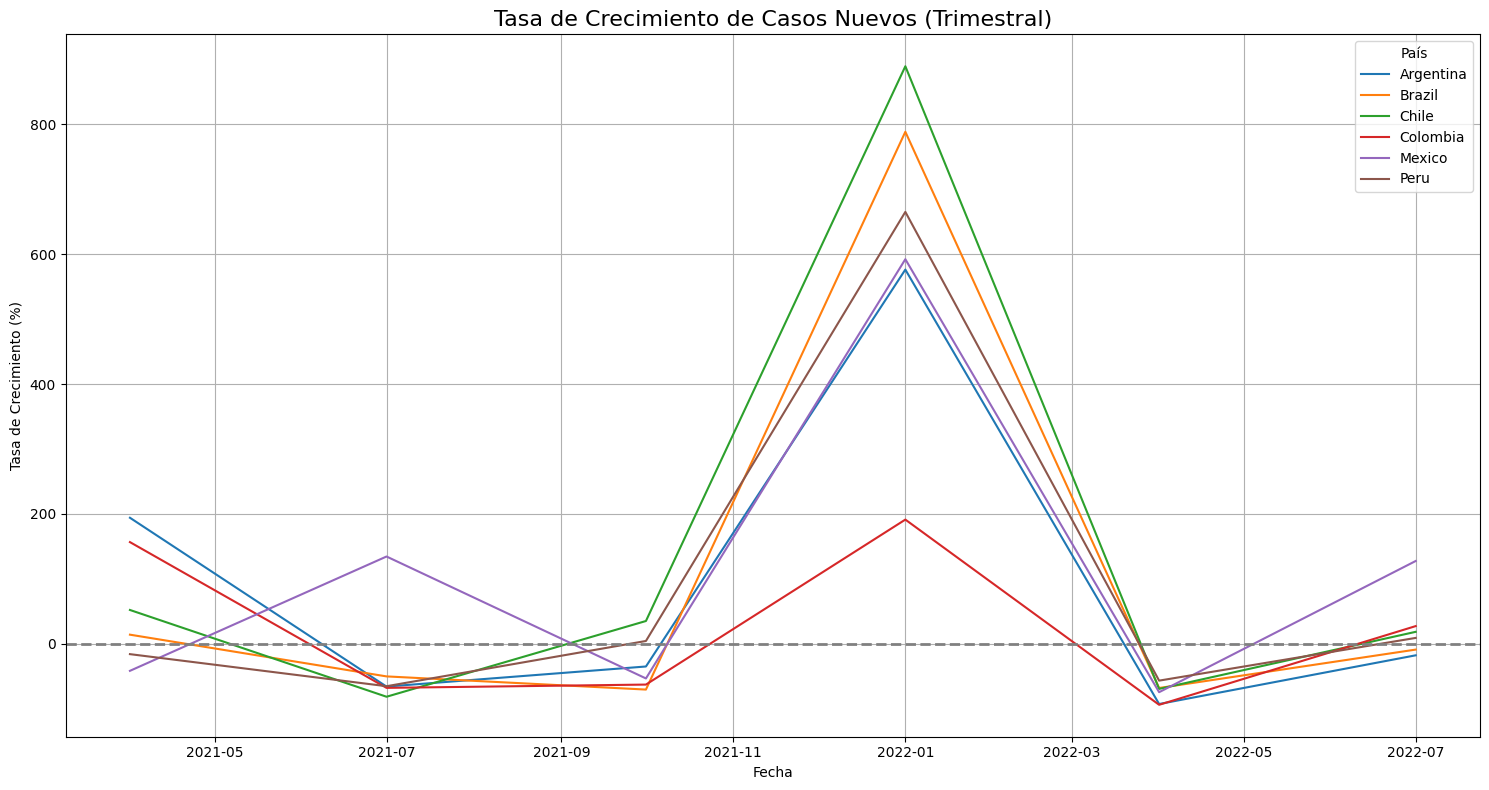

In [54]:
# 1. Preparamos los datos
# Agrupamos por fecha y país para obtener los casos nuevos diarios
df_casos_diarios = df.groupby(['date', 'country_name']).agg(new_confirmed=('new_confirmed', 'sum')).reset_index()
df_casos_diarios['date'] = pd.to_datetime(df_casos_diarios['date'])
df_casos_diarios = df_casos_diarios.set_index('date')

# 2. Calculamos la tasa de crecimiento trimestral
# Resampleamos los datos a nivel trimestral y calculamos la suma de casos
df_casos_trimestrales = df_casos_diarios.groupby('country_name').resample('QS')['new_confirmed'].sum().reset_index()

# Calculamos el porcentaje de cambio entre trimestres
df_casos_trimestrales['quarterly_growth_rate'] = df_casos_trimestrales.groupby('country_name')['new_confirmed'].pct_change() * 100

# Limpiamos los datos nulos (los primeros valores de cada país)
df_casos_trimestrales = df_casos_trimestrales.dropna()

# 3. Creamos el gráfico de líneas
plt.figure(figsize=(15, 8))
sns.lineplot(data=df_casos_trimestrales, x='date', y='quarterly_growth_rate', hue='country_name')

# Añadimos una línea de referencia en y=0%
plt.axhline(y=0, color='gray', linestyle='--', linewidth=2)

# Añadimos etiquetas y título
plt.title('Tasa de Crecimiento de Casos Nuevos (Trimestral)', fontsize=16)
plt.xlabel('Fecha')
plt.ylabel('Tasa de Crecimiento (%)')
plt.grid(True)
plt.legend(title='País')
plt.tight_layout()
plt.show()

Evolución del Número de Muertes Diarias 

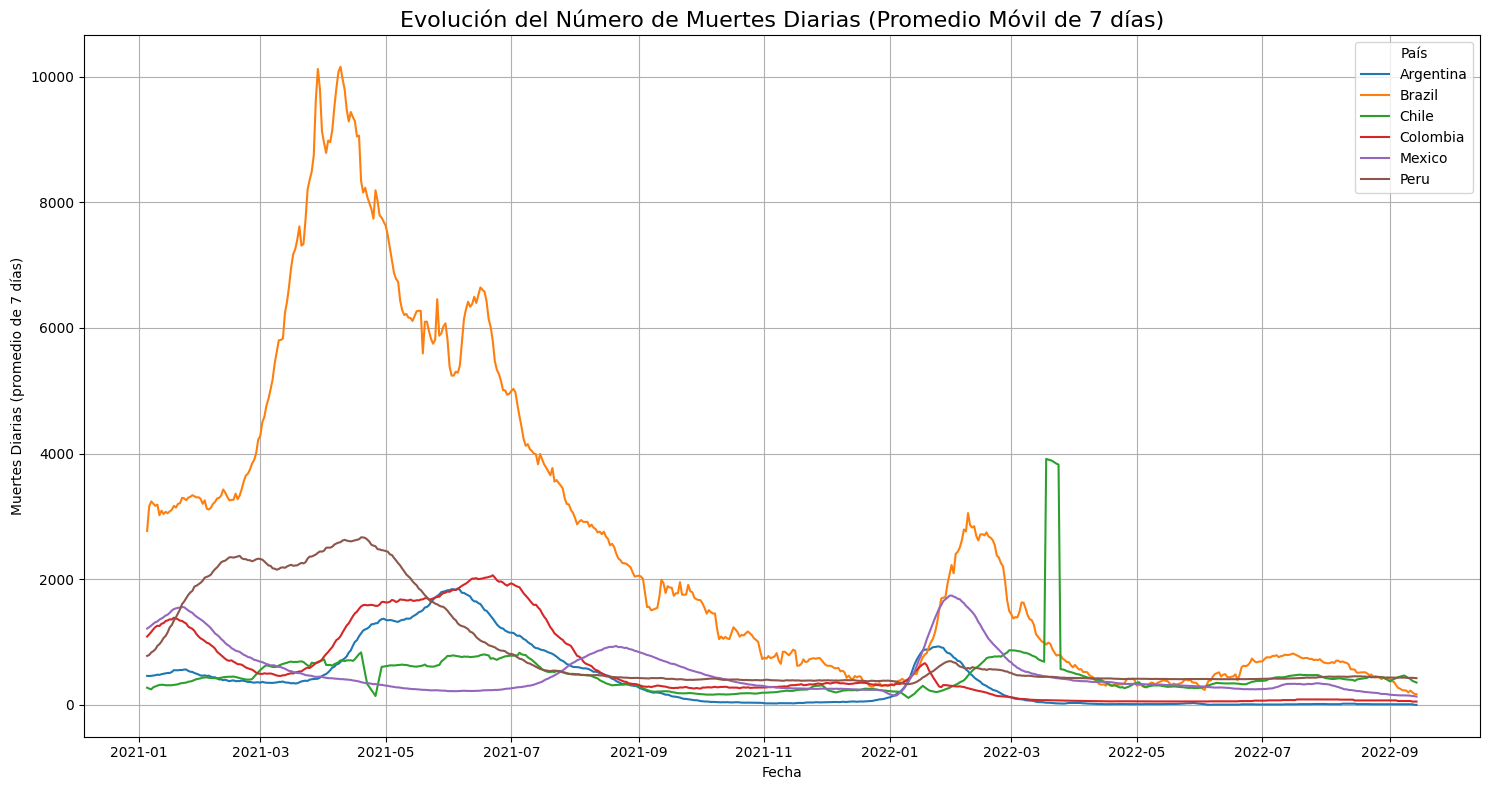

In [55]:

# 1. Preparamos los datos
# Agrupamos por fecha y país para obtener las muertes nuevas diarias
df_muertes_diarias = df.groupby(['date', 'country_name']).agg(new_deceased=('new_deceased', 'sum')).reset_index()
df_muertes_diarias['date'] = pd.to_datetime(df_muertes_diarias['date'])

# Calculamos el promedio móvil de 7 días para suavizar la línea
df_muertes_diarias['new_deceased_7d'] = df_muertes_diarias.groupby('country_name')['new_deceased'].rolling(window=7, center=True).mean().reset_index(level=0, drop=True)
df_muertes_diarias = df_muertes_diarias.dropna()

# 2. Creamos el gráfico de líneas
plt.figure(figsize=(15, 8))
sns.lineplot(data=df_muertes_diarias, x='date', y='new_deceased_7d', hue='country_name')

# Añadimos etiquetas y título
plt.title('Evolución del Número de Muertes Diarias (Promedio Móvil de 7 días)', fontsize=16)
plt.xlabel('Fecha')
plt.ylabel('Muertes Diarias (promedio de 7 días)')
plt.grid(True)
plt.legend(title='País')
plt.tight_layout()
plt.show()

## Guardamos el avance en el csv ya creado

In [56]:
df.to_csv('DatosFinalesFiltrado.csv', index=False)